# Exercise 1: American Airlines Employees

In [5]:
# loading libraries

library(tibble)
library(dplyr)
library(ggplot2)
library(ggpubr)
library(scales)
library(lubridate)

In [6]:
# plot size

std_width  <- 14
std_height <- 9
options(repr.plot.width = std_width, repr.plot.height = std_height)

In [7]:
# colors for plot

color_palette <- c( "#58508d",
                    "#bc5090",
                    "#ff6361",
                    "#ffa600" )

### 1) Read and import the data

In [8]:
# import data 

american <- read.table( "american_airline_empl.txt", header = T, sep = "\t" )
delta    <- read.table( "delta_airline_empl.txt",    header = T, sep = "\t" )
fedex    <- read.table( "federal_express_empl.txt",  header = T, sep = "\t" )
united   <- read.table( "united_airline_empl.txt",   header = T, sep = "\t" ) 

### 2) Create a common tibble

In [9]:
# add airline column to each dataset

american <- american %>% add_column(Company = "American Airlines")
delta <- delta %>% add_column(Company = "Delta Airlines")
fedex <- fedex %>% add_column(Company = "Federal Express Airlines")
united <- united %>% add_column(Company = "United Airlines")

In [10]:
# create unique tibble

data <- rbind(american, delta, fedex, united)
data <- as_tibble(data)
head(data)

Month Year Full.time Part.time Grand.Total Company          
1 1     1990 68,137    9,039     77,176      American Airlines
2 2     1990 68,725    9,273     77,998      American Airlines
3 3     1990 69,509    9,376     78,885      American Airlines
4 4     1990 69,713    9,326     79,039      American Airlines
5 5     1990 70,376    9,309     79,685      American Airlines
6 6     1990 71,258    9,369     80,627      American Airlines

In [11]:
# adjusting tibble (removing commas)

data <- data %>% transmute( 
                Month = Month,
                Year = Year,
                FT = as.numeric(sub(",", "", Full.time, fixed = TRUE)),
                PT = as.numeric(sub(",", "", Part.time, fixed = TRUE)),
                Tot = as.numeric(sub(",", "", Grand.Total, fixed = TRUE)),
                Company = Company )

### 3) Plot of the employees as a function of time for all companies

In [12]:
# calculating number of employees annual mean for each company 

dataM <- data %>% group_by(Year, Company)
# filtering out year 2023 because in this case we don't need it
dataM <- filter(dataM, Year != 2023) 
dataM <- dataM %>% summarise(FT = mean(FT), PT = mean(PT), Tot = mean(Tot))

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


In [13]:
head(dataM)

Year Company                  FT       PT        Tot     
1 1990 American Airlines        71252.75  9463.417 80716.17
2 1990 Delta Airlines           57445.75  4301.500 61747.25
3 1990 Federal Express Airlines 64834.25 23565.250 88399.50
4 1990 United Airlines          67644.58  5690.667 73335.25
5 1991 American Airlines        77587.92 11084.583 88672.50
6 1991 Delta Airlines           62714.42  4951.000 67665.42

In [40]:
# full-time plot

gFT <- ggplot( dataM, aes(x = Year, y = FT, color=Company) ) +
       geom_point( size = 3 ) +
       geom_line( linewidth = 1 )

gFT <- gFT + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          linewidth = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Year", 
              y = "Full-Time Employees", 
              title = "Full-Time Employees Annual Averages" )

gFT <- gFT +
        scale_x_continuous(breaks = seq(1990, 2024, by = 5)) + 
        scale_y_continuous(n.breaks = 7)

In [41]:
# part-time plot

gPT <- ggplot( dataM, aes(x = Year, y = PT, color=Company) ) +
       geom_point( size = 3 ) +
       geom_line( linewidth = 1 )

gPT <- gPT + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Year", 
              y = "Part-Time Employees", 
              title = "Part-Time Employees Annual Averages" )

gPT <- gPT +
        scale_x_continuous( breaks = seq(1990, 2024, by = 5) ) + 
        scale_y_continuous( breaks = seq(0, 70000, by = 10000) )

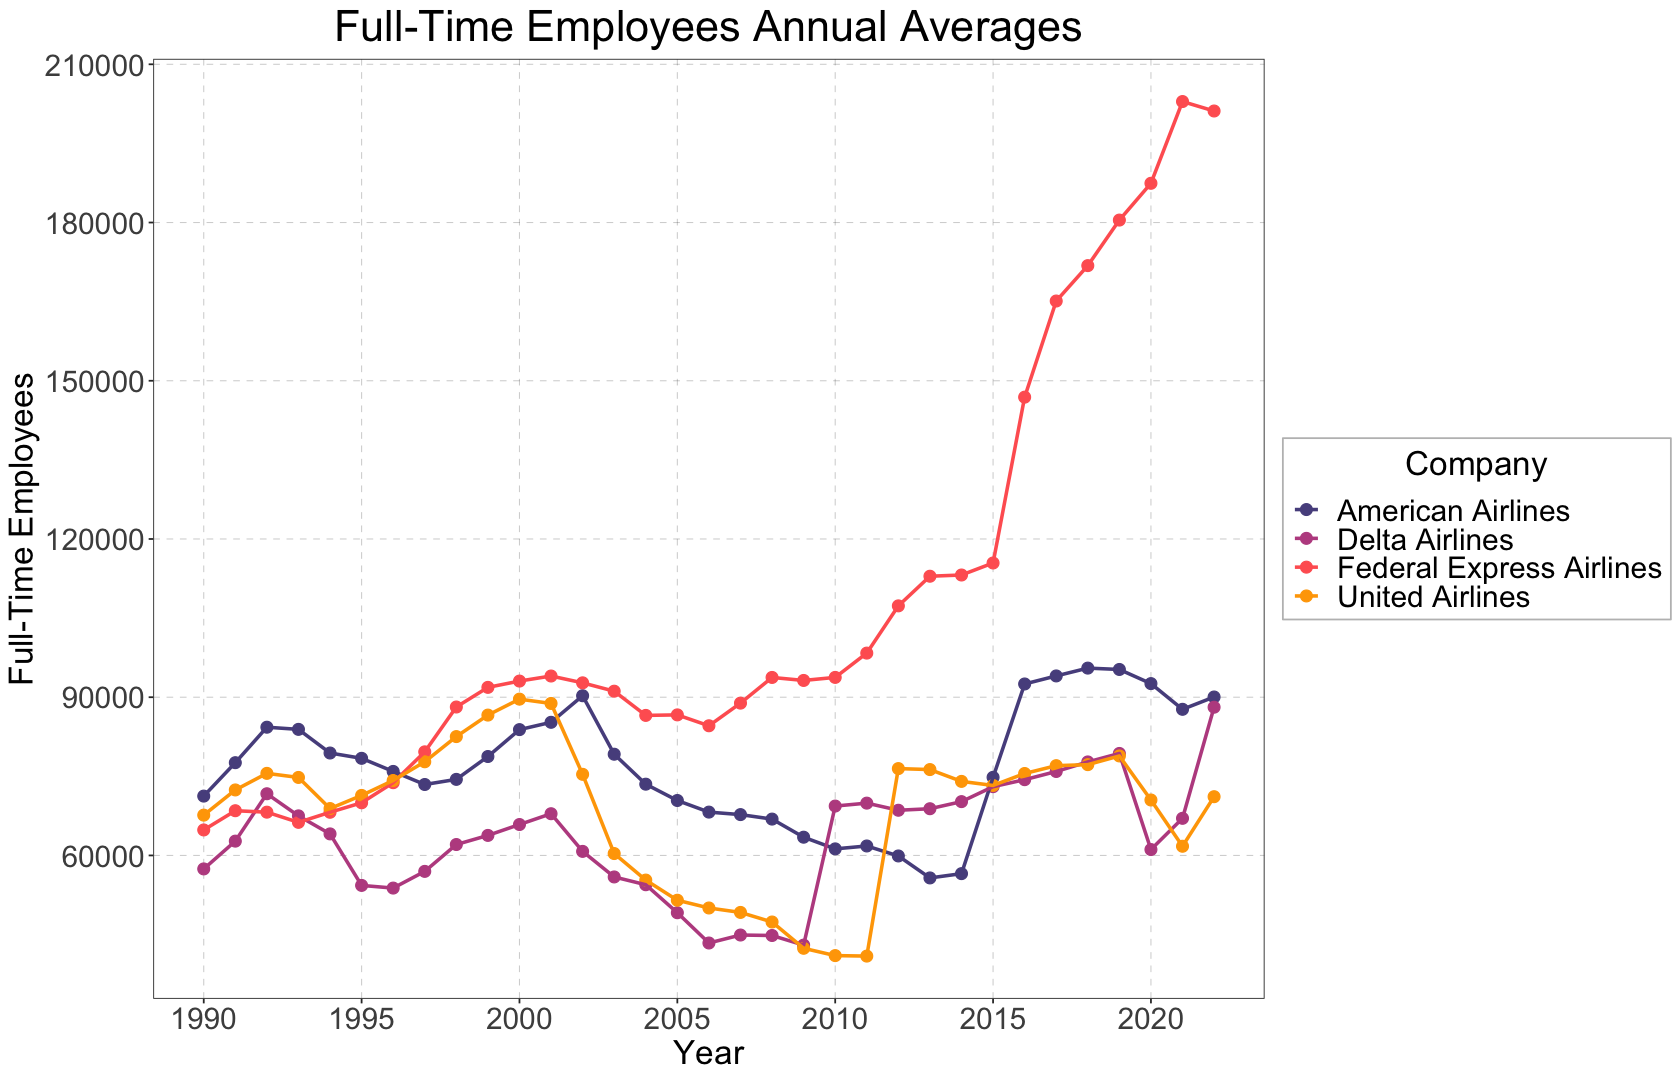

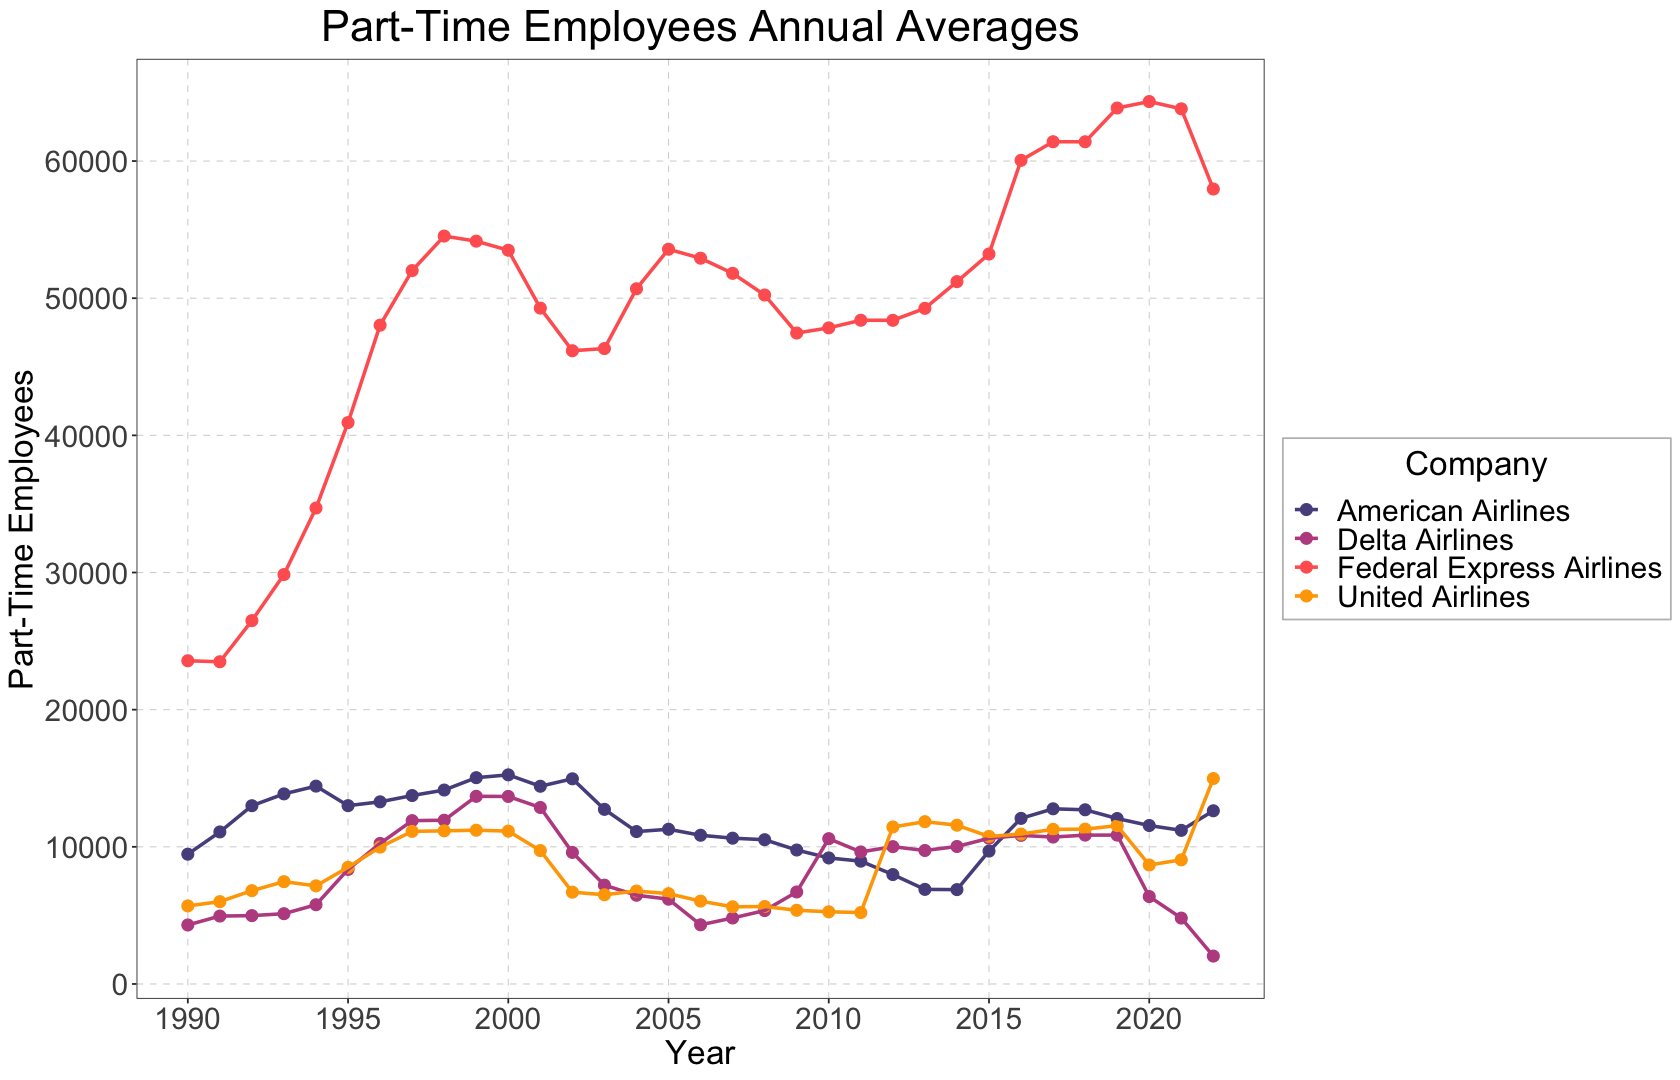

In [42]:
gFT
gPT

In [57]:
# day by day

dataT <- data %>% group_by(Company)
dataT <- dataT %>% transmute(
                    # days sequence
                    Time = seq( as.Date("1990/01/01"), as.Date("2023/01/01"), "month" ), 
                    FT = FT, 
                    PT = PT,
                    Tot = Tot,
                    Company = Company )

In [50]:
# plot FT

g3a <- ggplot(dataT, aes(x = Time, y = FT, color = Company)) +
       geom_line(linewidth = 1.5 ) 

g3a <- g3a + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Time", 
              y = "Full-Time Employees", 
              title = "Full-Time Employees in Years 1990 - 2023" )

g3a <- g3a +
        scale_x_date(date_breaks = "3 year", date_labels = "%Y") +
        scale_y_continuous( n.breaks = 9 )

In [52]:
# plot PT

g3b <- ggplot(dataT, aes(x = Time, y = PT, color = Company)) +
       geom_line(linewidth = 1.5 ) 

g3b <- g3b + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Time", 
              y = "Part-Time Employees", 
              title = "Part-Time Employees in Years 1990 - 2023" )

g3b <- g3b +
        scale_x_date(date_breaks = "3 year", date_labels = "%Y") +
        scale_y_continuous( n.breaks = 9 )

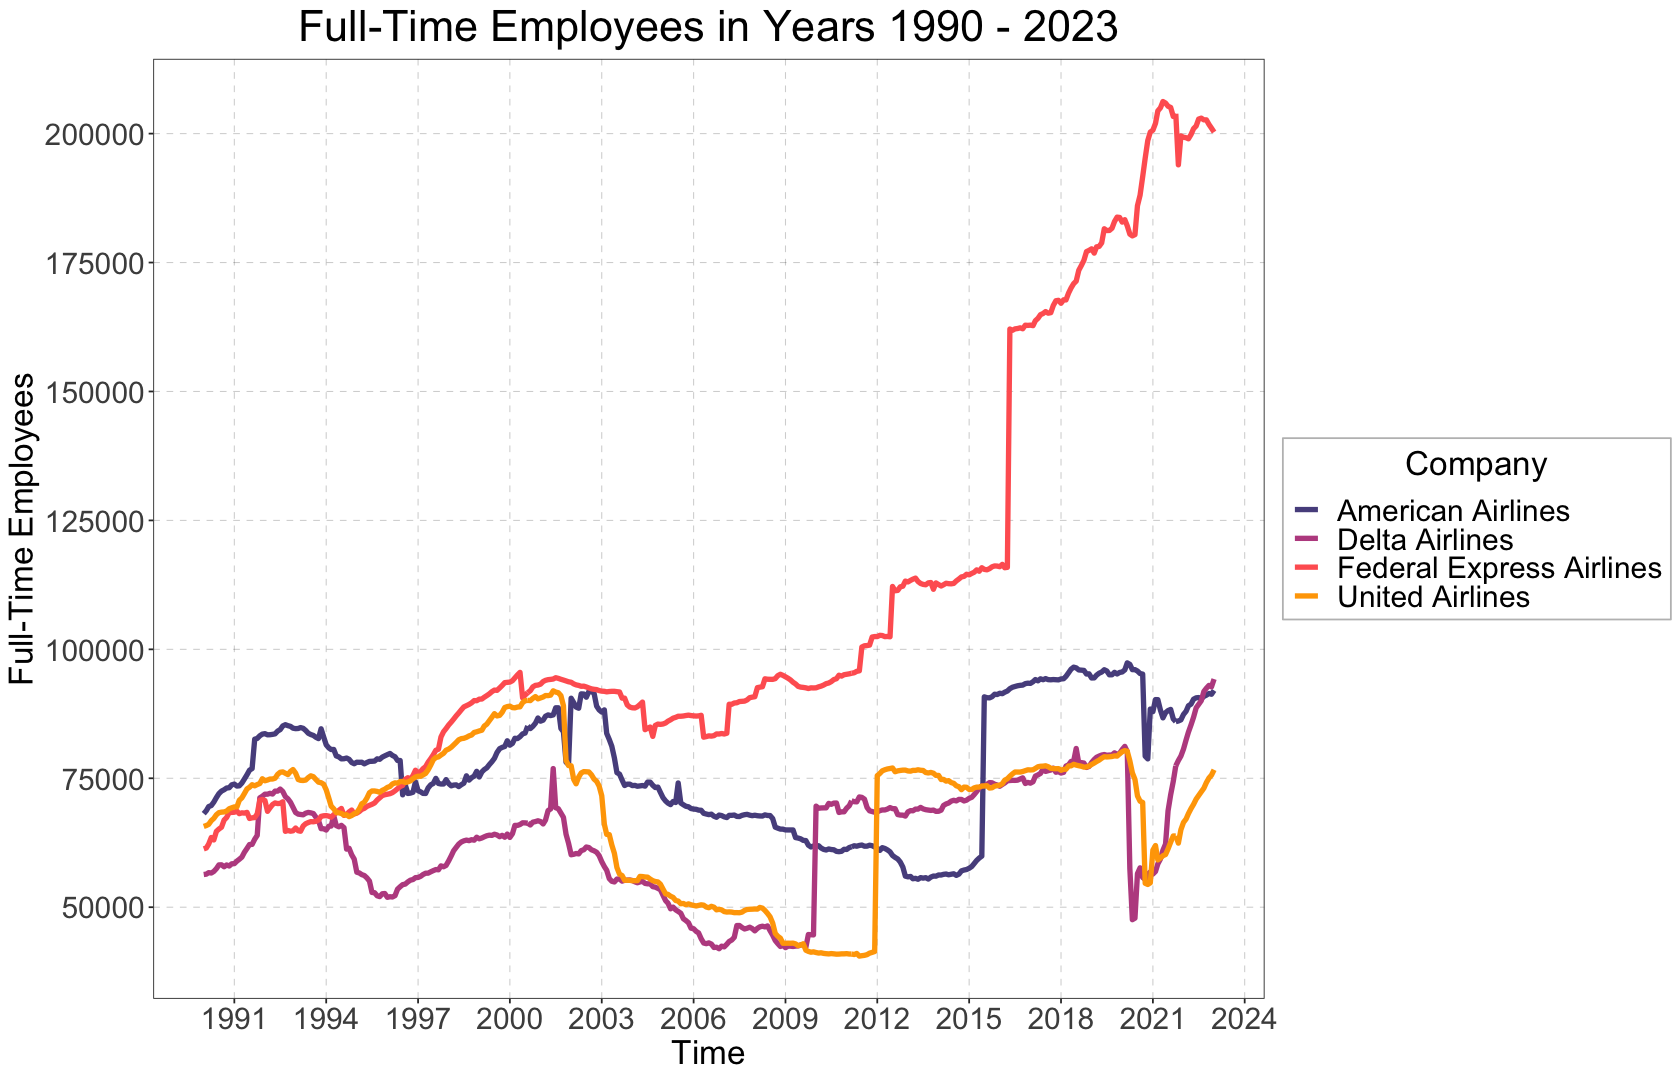

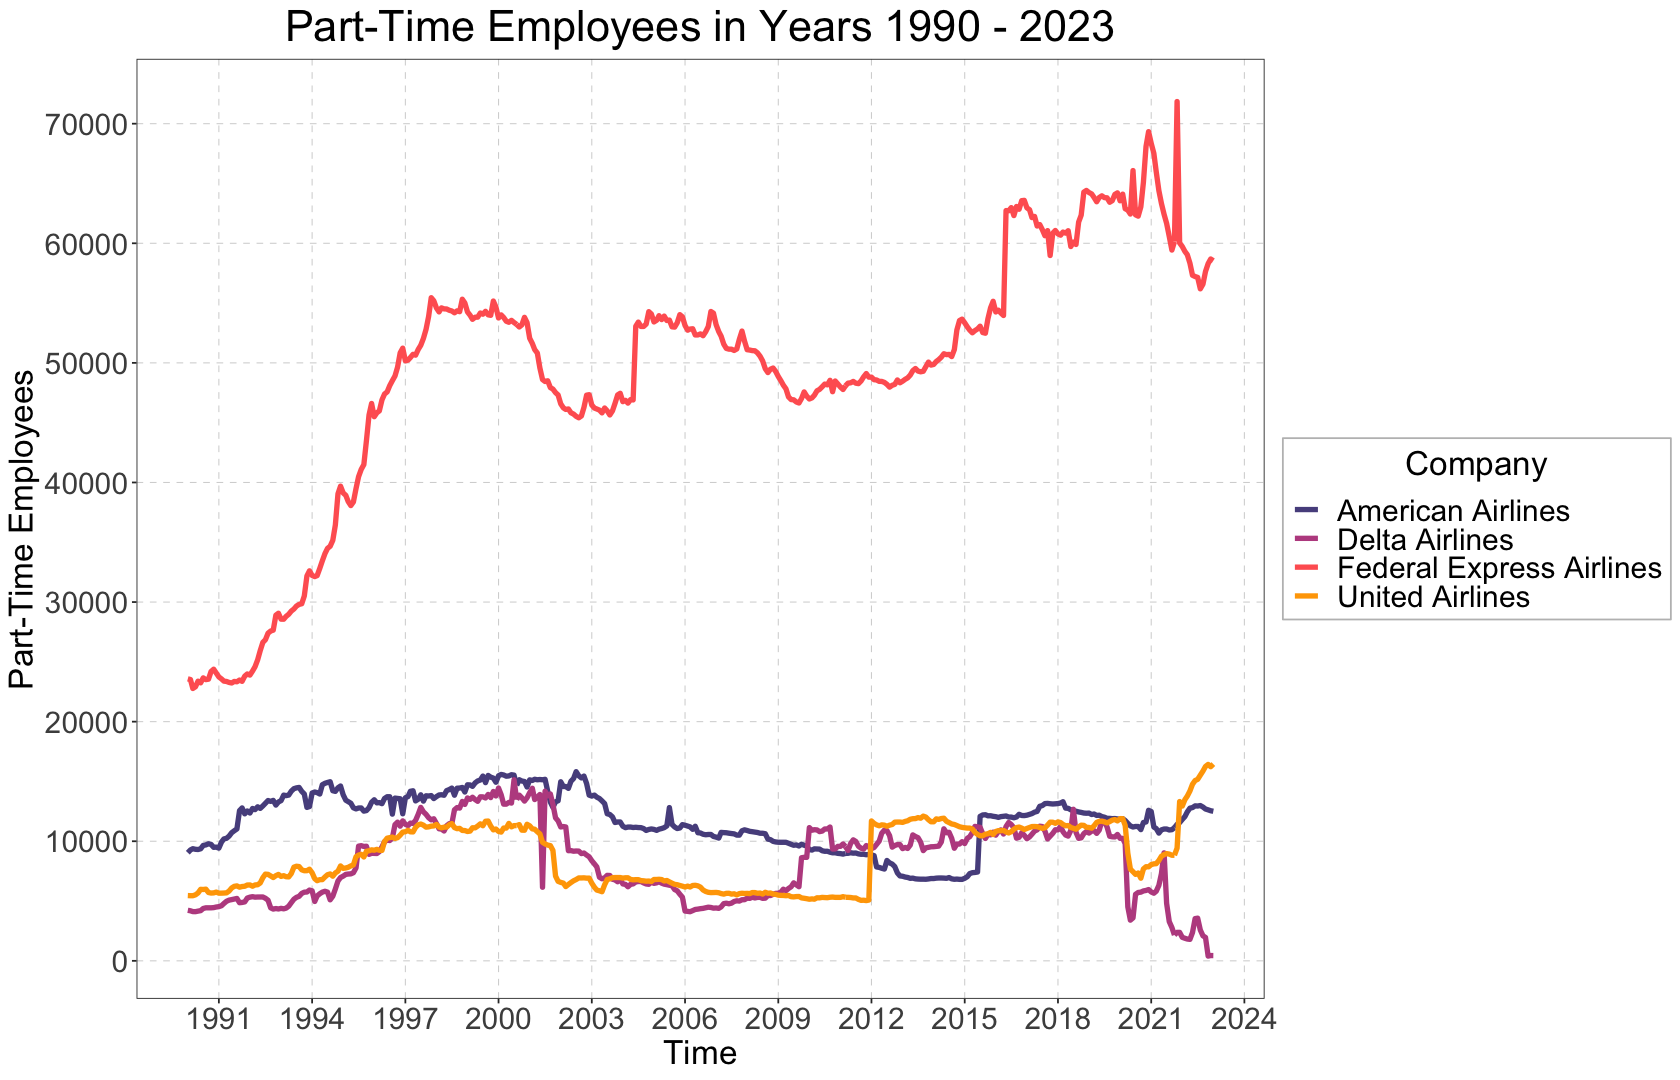

In [53]:
g3a
g3b

### 4) Minimum and maximum number of employees for each company

In [63]:
# minimum number of employees

filter(dataT, Tot <= min(Tot))

Time       FT    PT    Tot   Company                 
1 2013-09-01 55462  6828 62290 American Airlines       
2 2006-11-01 41948  4462 46410 Delta Airlines          
3 1990-01-01 61305 23580 84885 Federal Express Airlines
4 2011-06-01 40522  5259 45781 United Airlines

In [64]:
# maximum number of employees

filter(dataT, Tot >= max(Tot))

Time       FT     PT    Tot    Company                 
1 2018-06-01  96543 12628 109171 American Airlines       
2 2023-01-01  94236   439  94675 Delta Airlines          
3 2021-03-01 204406 65977 270383 Federal Express Airlines
4 2001-03-01  91041 11005 102046 United Airlines

In [61]:
# plot to visualize min and max number of employees for each company
# plot of total number of employees trend over years for each company

gET <- ggplot( dataT, aes(x = Time, y = Tot, color = Company) ) +
       geom_line( linewidth = 1.3 )

gET <- gET + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Time", 
              y = "Total Employees", 
              title = "Total Employees in Years 1990 - 2023" )

gET <- gET +
        scale_x_date(date_breaks = "3 year", date_labels = "%Y") +
        scale_y_continuous( n.breaks = 9 )

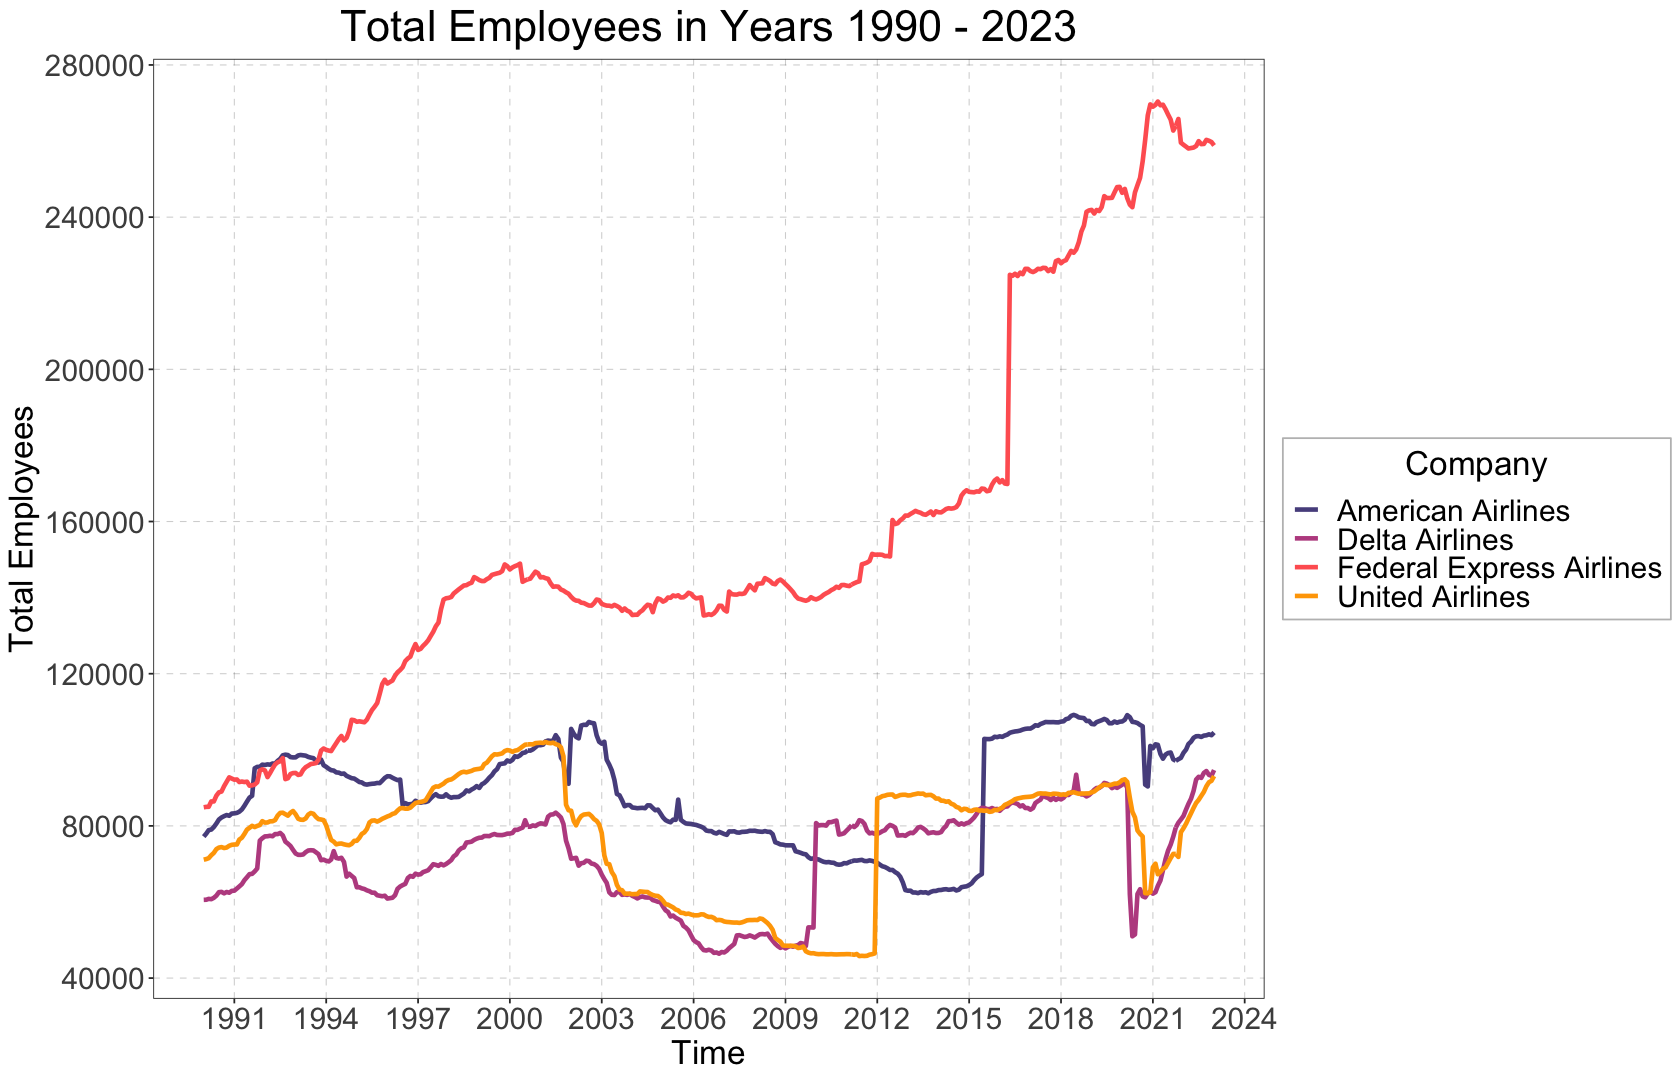

In [62]:
gET

### 5) Plot of the fraction of PT worker over TOT employees as a function of time

In [65]:
# calculating PT/TOT fraction

dataF <- dataT %>% transmute( Time = Time,
                              PTF = PT / Tot,
                              Company = Company)

In [66]:
# plot

gPTF <- ggplot( dataF, aes(x = Time, y = PTF, color = Company) ) +
       geom_line( linewidth = 1.3 )

gPTF <- gPTF + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 18),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Time", 
              y = "% Part-Time Employees", 
              title = "Part-Time employees on Total Employees over Time" )

gPTF <- gPTF +
        scale_x_date(date_breaks = "5 years", date_labels = "%Y") +
        scale_y_continuous(labels = scales::percent)

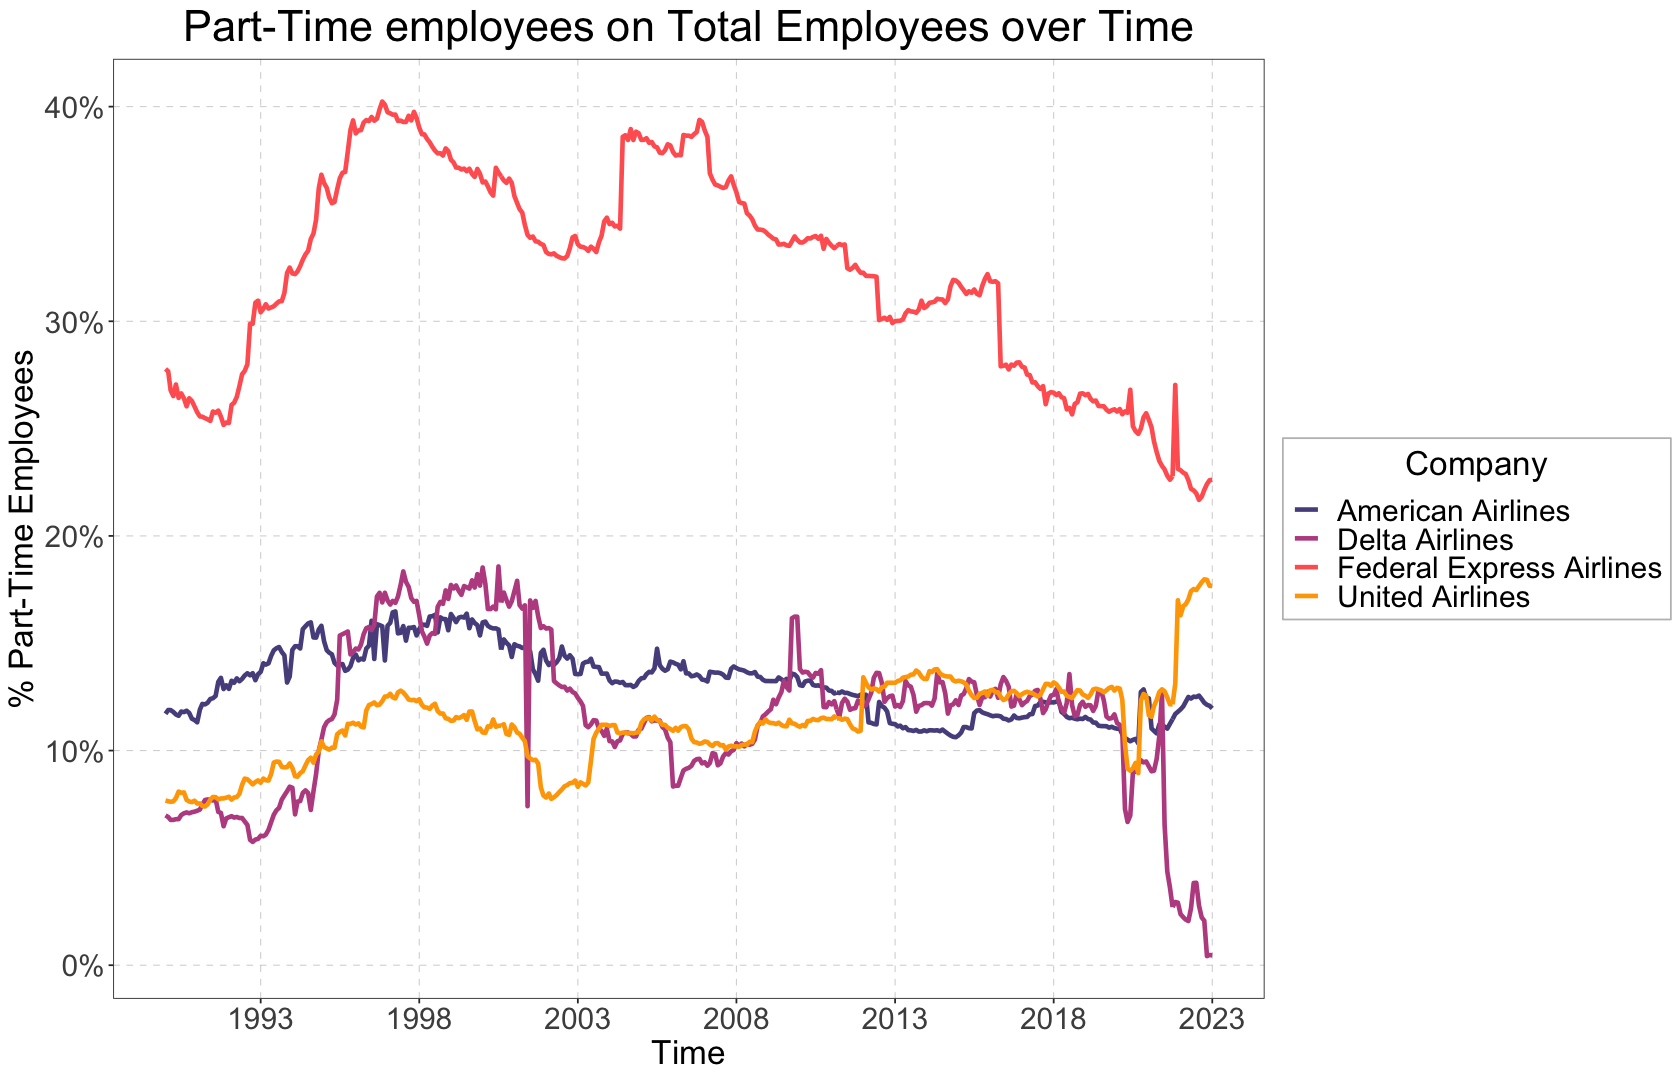

In [67]:
gPTF

### 6) Influence of pandemic: trend in years 2019 - 2023

In [73]:
# analyzing years 2019-2023
dataP <- filter(dataT, Time >= "2019/01/01")

In [75]:
# plot

gTP <- ggplot( dataP, aes(x = Time, y = Tot, color = Company) ) +
       geom_point( size = 3 ) +
       geom_line( linewidth = 1 )

gTP <- gTP + 
       theme_bw() +
       theme( legend.position = "right",
        plot.title = element_text(size = 26, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text  = element_text(size = 16),
        axis.text.x=element_text(angle=30, hjust=1),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           size = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                          size = 0.3,
                                          linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Time", 
              y = "Total Employees", 
              title = "Total Employees in Years 2019 - 2023" )

gTP <- gTP +
        scale_x_date(date_breaks = "6 month", date_labels = "%Y %b") +
        scale_y_continuous( n.breaks = 8 ) 

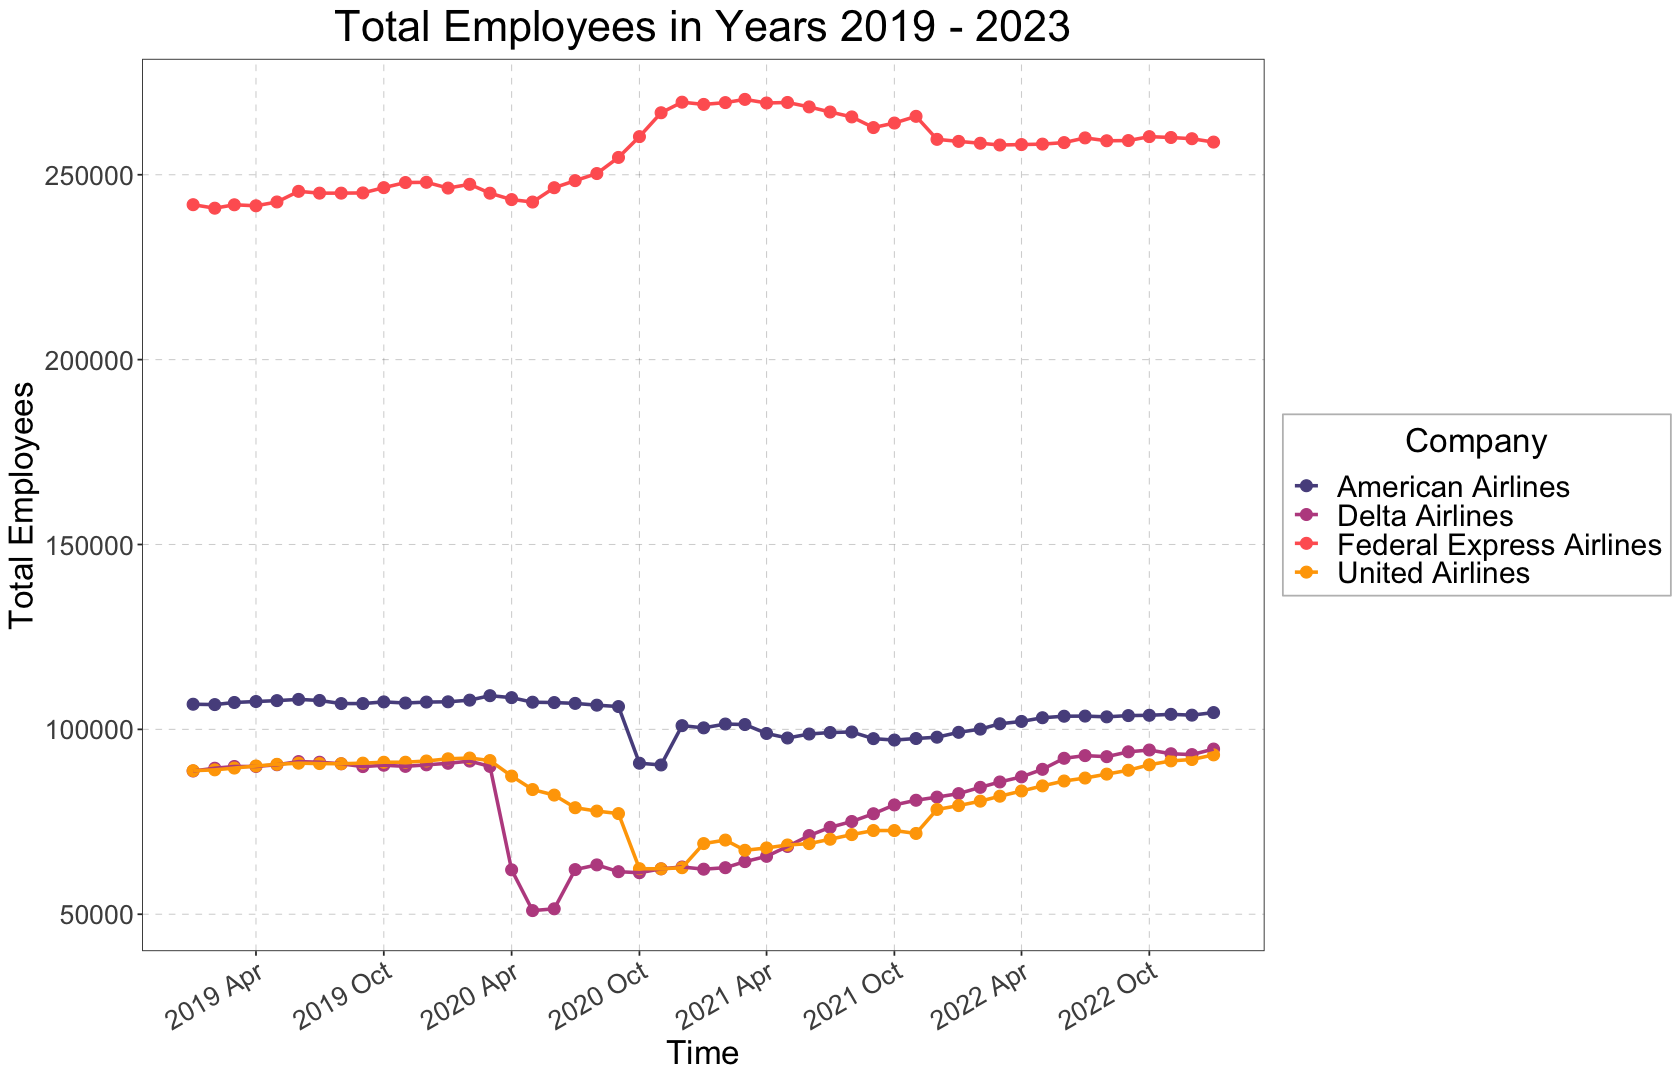

In [76]:
gTP

Apart from FedEx Airlines, a similar trend during years 2019 - 2023 is evident for the other three. 

Globally, with the outbreak of the pandemic, from March 2020 the number of employees begins to decline to a relative minimum and then steadily rise again, returning, in January 2023, to about pre-pandemic levels. Specifically, Delta Airlines is the first company to reach the relative minimum, nearly halving the number of employees. In contrast, American Airlines and United Airlines follow a very similar trend, reaching a relative minimum of total employees in October 2020 and then slowly increasing. Moreover, the relative lows reached during the pandemic are not as low as the lows reached due to the effects of the 2007-2008 financial crisis. 

These trends show that the pandemic has affected the number of total employees for the airlines analyzed (apart from FedEx). In fact, the number of total employees declined following the outbreak of the pandemic, reaching a low more or less in a short period of time, and then rising steadily until today.

As for FedEx Airlines, on the other hand, the trend is completely different, overall increasing since 1990. Moreover, for this company, the number of total employees increases rapidly from the outbreak of pandemic to the end of 2020.

----------------------------------------------------------------------------------------------

# Exercise 2: Data Frames and Tibble

* `nycflights13` package

In [77]:
library(nycflights13)

### 1.1) Total number of flights departed from each of the three NYC airports as a function of time (one entry for each of the 365 days of the year)

In [195]:
head(flights)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      600            -6         812      837          
6 2013 1     1   554      558            -4         740      728          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2  20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4 -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
6  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00
3 2013-01-01 05:00:00
4 2013-01-01 05:00:00
5 2013-01-01 06:00:00
6 2013-01-01 05:00:00

In [197]:
fNYC <- flights %>% group_by(year, month, day, origin)
fNYC <- fNYC %>% summarise(tot = length(flight))
fNYC <- fNYC %>% transmute( date = paste(year, month, day, sep = "-"),
                            origin = origin,
                            tot = tot )
fNYC <- fNYC %>% transmute( date = as.Date(date),
                            Airport = origin,
                            tot = tot )
head(fNYC)

`summarise()` has grouped output by 'year', 'month', 'day'. You can override
using the `.groups` argument.


year month day date       Airport tot
1 2013 1     1   2013-01-01 EWR     305
2 2013 1     1   2013-01-01 JFK     297
3 2013 1     1   2013-01-01 LGA     240
4 2013 1     2   2013-01-02 EWR     350
5 2013 1     2   2013-01-02 JFK     321
6 2013 1     2   2013-01-02 LGA     272

In [198]:
# plot

g <- ggplot( fNYC, aes( x = date, y = tot, color = Airport) ) + 
    geom_line( linewidth = 0.7) + 
    geom_point( size = 1)

g <- g +
    theme_bw() + 
    theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Year", 
              y = "Total Number of Flights", 
              title = "Total Number of Flights from each of the three NYC airports during 2013" )

g <- g +
        scale_x_date(date_breaks = "1 month", date_labels = "%b") +
        scale_y_continuous( n.breaks = 10 ) 

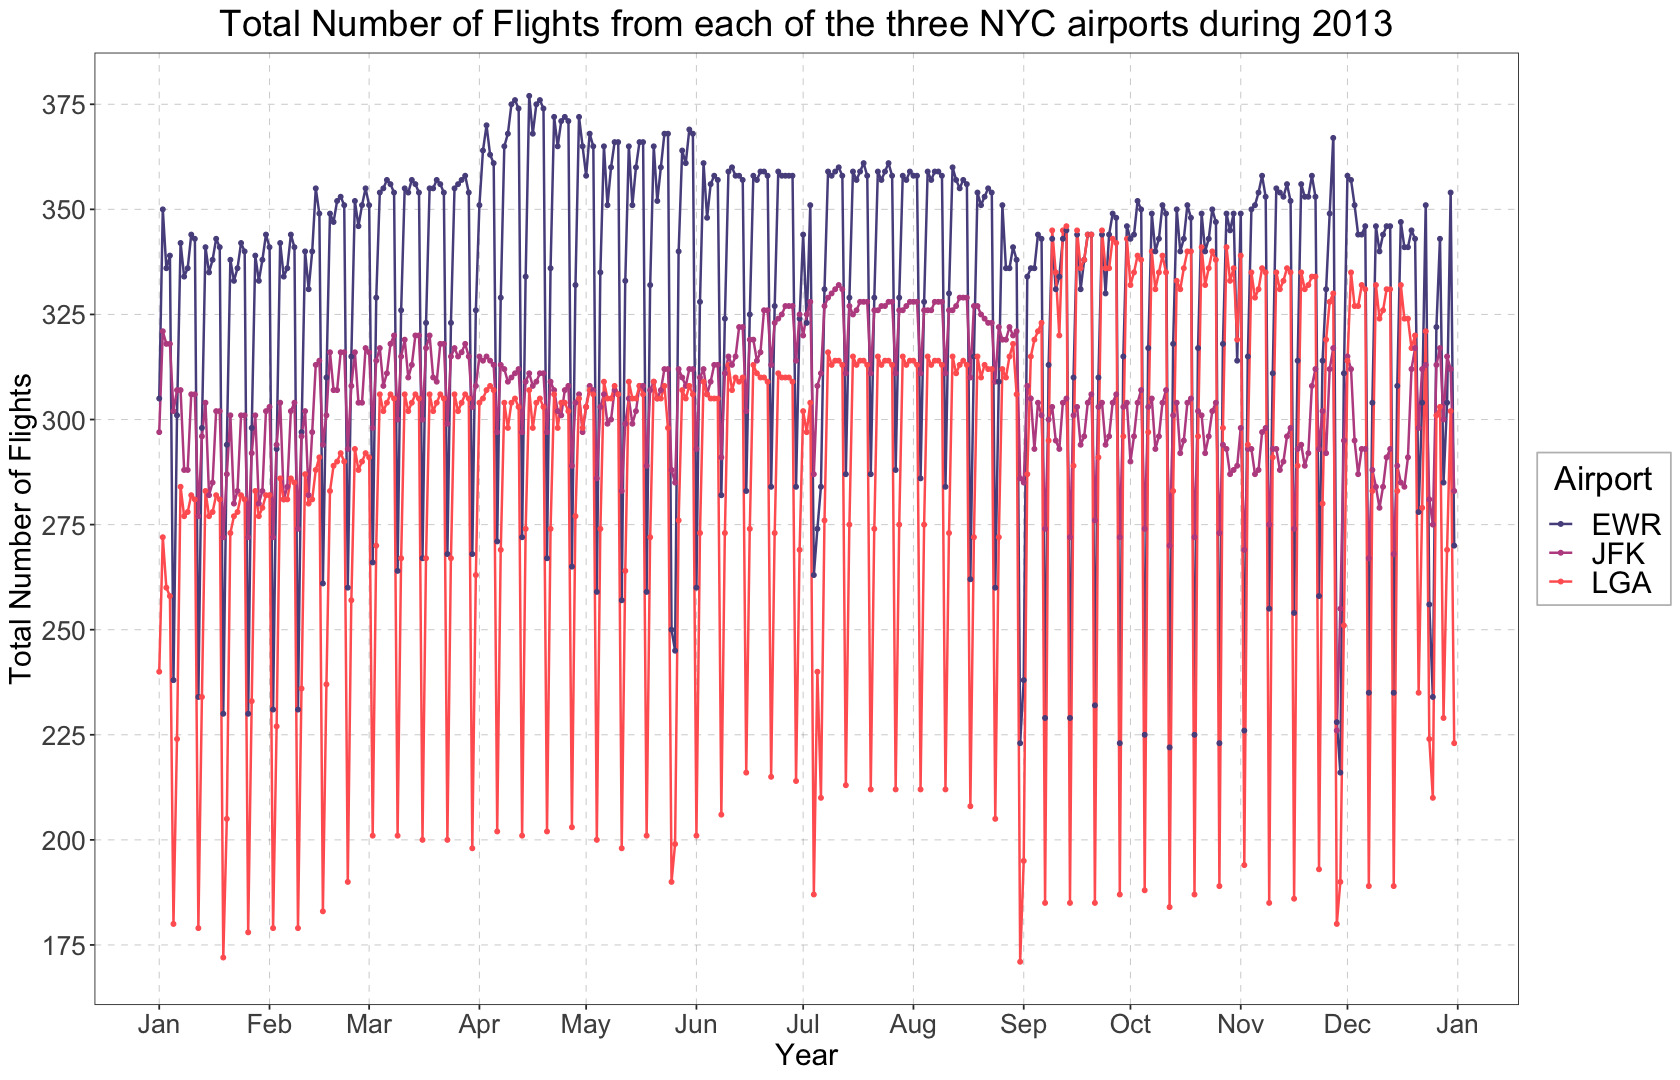

In [199]:
g

### 1.2.1) Average number of flights computed over the first five working days of each week as a function of the week number of the year 

In [201]:
fNYC <- fNYC %>% transmute( week = isoweek(ymd(date)),
                            date = date,
                            Airport = Airport,
                            tot = tot )
fNYC <- fNYC %>% transmute( week = week,
                            # day of week (number)
                            dow = wday(date, week_start = 1),
                            date = date,
                            Airport = Airport,
                            tot = tot )
head(fNYC)

year month day week dow date       Airport tot
1 2013 1     1   1    2   2013-01-01 EWR     305
2 2013 1     1   1    2   2013-01-01 JFK     297
3 2013 1     1   1    2   2013-01-01 LGA     240
4 2013 1     2   1    3   2013-01-02 EWR     350
5 2013 1     2   1    3   2013-01-02 JFK     321
6 2013 1     2   1    3   2013-01-02 LGA     272

In [202]:
# average over first 5 working days

fNYCwd <- filter(fNYC, dow <=5)
fNYCwd <- fNYCwd %>% group_by(week, Airport)
fNYCwd <- fNYCwd %>% transmute( week = week,
                            dow = dow,
                            date = date,
                            Airport = Airport,
                            tot = mean(tot) )
head(fNYCwd)

week dow date       Airport tot     
1 1    2   2013-01-01 EWR     325.6667
2 1    2   2013-01-01 JFK     308.1667
3 1    2   2013-01-01 LGA     259.1667
4 1    3   2013-01-02 EWR     325.6667
5 1    3   2013-01-02 JFK     308.1667
6 1    3   2013-01-02 LGA     259.1667

In [203]:
# plot 

gwd <- ggplot(fNYCwd, aes( x = week, y = tot, color = Airport) ) + 
        geom_line( linewidth = 1 ) + 
        geom_point( size = 1.6 )

gwd <- gwd +
    theme_bw() + 
    theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Week", 
              y = "Average over Working Days", 
              title = "Average Number of Flights over Working Days from NYC Airports in 2013" )

gwd <- gwd +
        scale_x_continuous( n.breaks = 10 ) +
        scale_y_continuous( n.breaks = 10 ) 

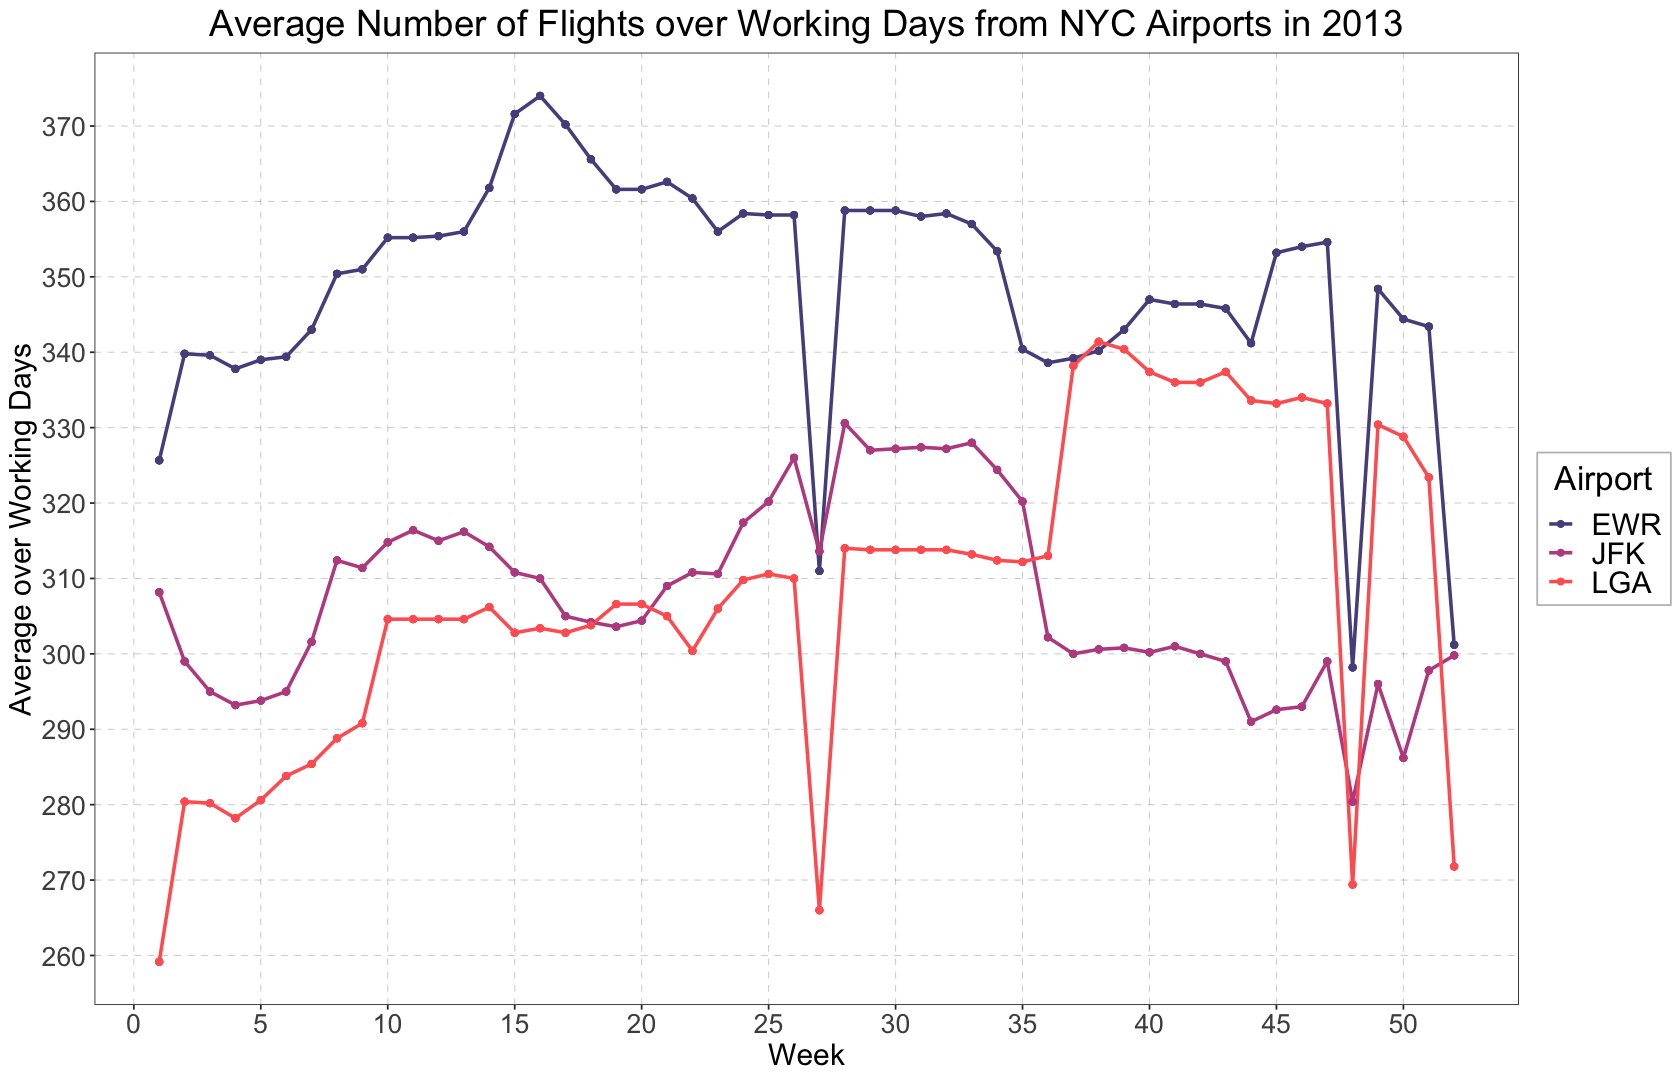

In [204]:
gwd

In [205]:
# average on we

fNYCwe <- filter(fNYC, dow > 5)
fNYCwe <- fNYCwe %>% group_by(week, Airport)
fNYCwe <- fNYCwe %>% transmute( week = week,
                            dow = dow,
                            date = date,
                            Airport = Airport,
                            tot = mean(tot) )
head(fNYCwe)

week dow date       Airport tot  
1 1    6   2013-01-05 EWR     269.5
2 1    6   2013-01-05 JFK     304.5
3 1    6   2013-01-05 LGA     202.0
4 1    7   2013-01-06 EWR     269.5
5 1    7   2013-01-06 JFK     304.5
6 1    7   2013-01-06 LGA     202.0

In [206]:
# plot 

gwe <- ggplot(fNYCwe, aes( x = week, y = tot, color = Airport) ) + 
        geom_line( linewidth = 1 ) + 
        geom_point( size = 1.6 )

gwe <- gwe +
    theme_bw() + 
    theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Week", 
              y = "Average over Weekend", 
              title = "Average Number of Flights over Weekend from NYC Airports in 2013" )

gwe <- gwe +
        scale_x_continuous( n.breaks = 10 ) +
        scale_y_continuous( n.breaks = 10 ) 

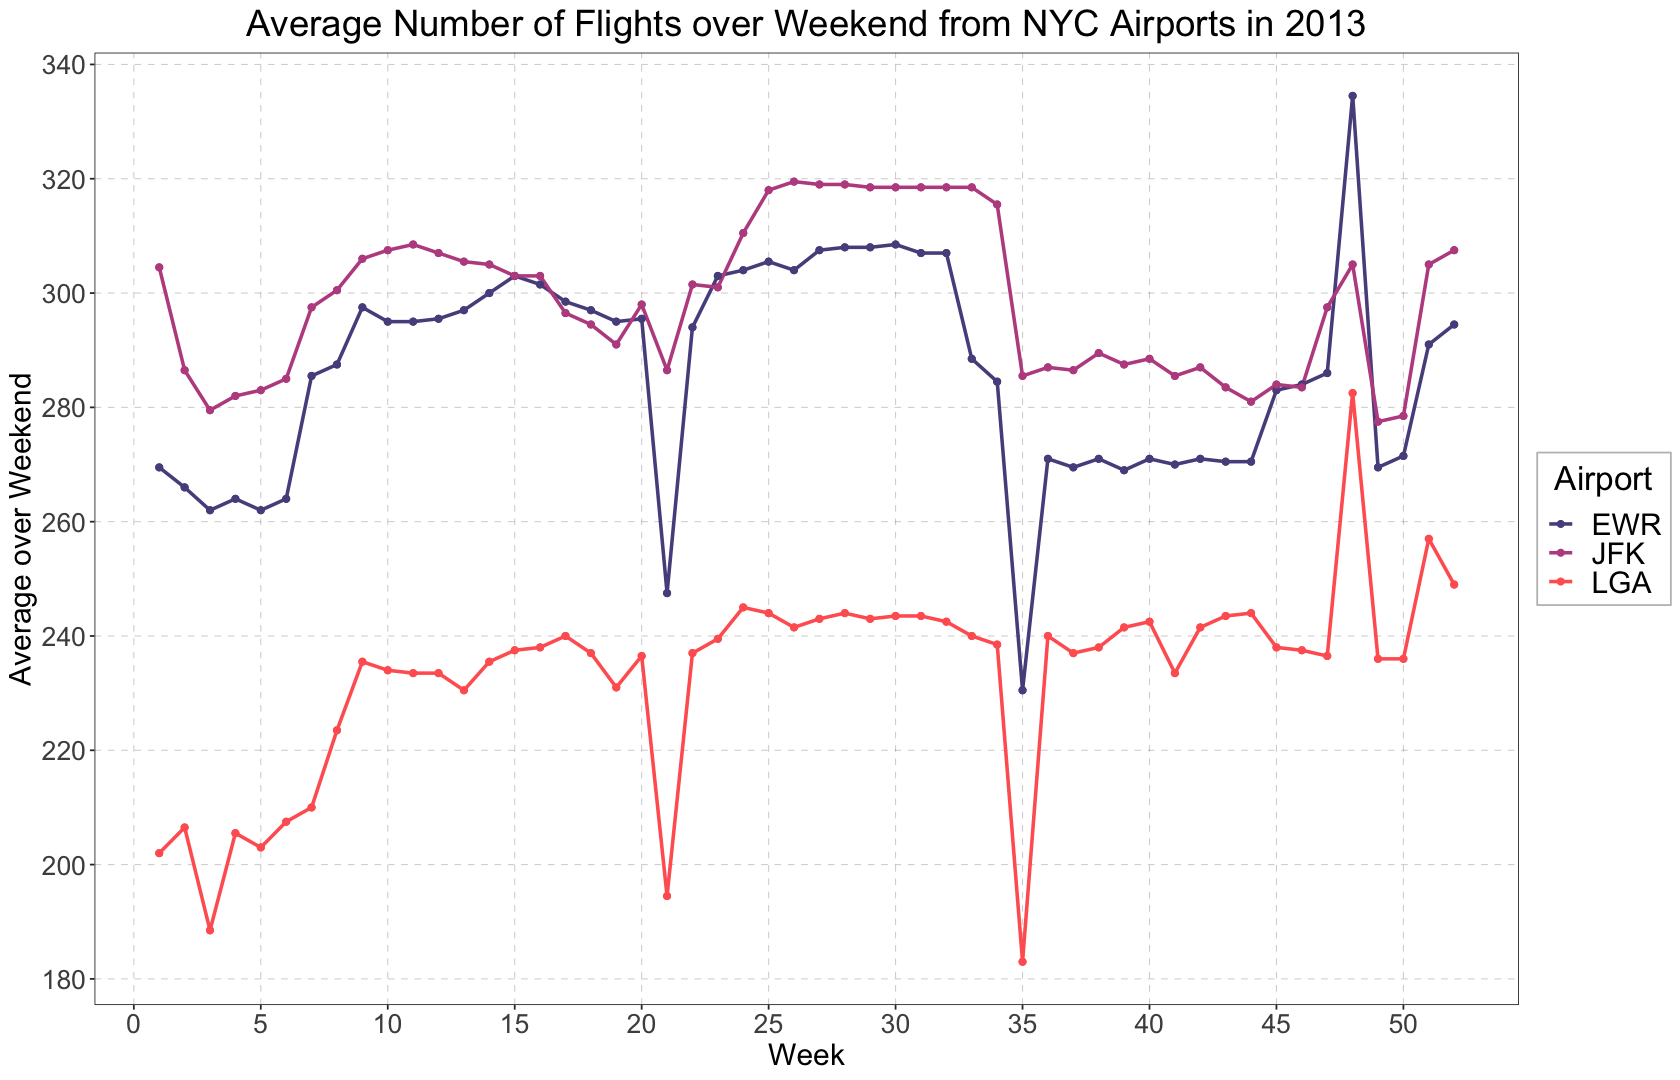

In [207]:
gwe

### 2) Departure delay

In [92]:
dd <- flights %>% group_by(year, month, day, origin)
dd <- dd %>% transmute( date = paste(year, month, day, sep = "-"),
                        dep_delay = dep_delay,
                        flight = flight )
dd <- dd %>% transmute( date = as.Date(date),
                        depDelay = dep_delay,
                        flight = flight,
                        Airport = origin )

dd <- dd %>% ungroup()
#  filtering out NA in depDelay (deleted flights)
dd <- dd %>% filter(!is.na(depDelay)) 

head(dd)

year month day origin date       depDelay flight Airport
1 2013 1     1   EWR    2013-01-01  2       1545   EWR    
2 2013 1     1   LGA    2013-01-01  4       1714   LGA    
3 2013 1     1   JFK    2013-01-01  2       1141   JFK    
4 2013 1     1   JFK    2013-01-01 -1        725   JFK    
5 2013 1     1   LGA    2013-01-01 -6        461   LGA    
6 2013 1     1   EWR    2013-01-01 -4       1696   EWR

In [93]:
# filter by airport
dEWR <- dd %>% filter(origin == "EWR")
dLGA <- dd %>% filter(origin == "LGA")
dJFK <- dd %>% filter(origin == "JFK")

In [94]:
# minimum delays --> departure ahead of time

# group by date
dEWR <- dEWR %>% group_by(date)
dLGA <- dLGA %>% group_by(date)
dJFK <- dJFK %>% group_by(date)

dEWRmin <- filter(dEWR, depDelay <= min(depDelay))
dLGAmin <- filter(dLGA, depDelay <= min(depDelay))
dJFKmin <- filter(dJFK, depDelay <= min(depDelay))

In [95]:
# maximum delays

dEWRmax <- filter(dEWR, depDelay >= max(depDelay))
dLGAmax <- filter(dLGA, depDelay >= max(depDelay))
dJFKmax <- filter(dJFK, depDelay >= max(depDelay))

In [96]:
# average 

dEWRmean <- dEWR %>% summarise( meanDelay = mean(depDelay))
dLGAmean <- dLGA %>% summarise( meanDelay = mean(depDelay))
dJFKmean <- dJFK %>% summarise( meanDelay = mean(depDelay))

In [97]:
# plot for each airport

gEWR <- ggplot() + 
        geom_line(data = dEWRmean, aes(x = date, y = meanDelay, color = "Mean"))

gEWR <- gEWR + 
        geom_line(data = dEWRmax, aes(x = date, y = depDelay, color = "Maximum"))

gEWR <- gEWR +  
        geom_line(data = dEWRmin, aes(x = date, y = depDelay, color = "Minimum"))

gEWR <- gEWR + 
        theme_bw() + 
        theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Days", 
              y = "Delay (min/day)", 
              title = "Departure Delay per Day for Flights from EWR Airport in NYC (2013)" )

gEWR <- gEWR +
        scale_x_date(date_breaks = "2 month", date_labels = "%b-%d") +
        scale_y_continuous( n.breaks = 8 ) +
        labs(color='Delay') 

In [98]:
# plot LGA

gLGA <- ggplot() + 
        geom_line(data = dLGAmean, aes(x = date, y = meanDelay, color = "Mean"))

gLGA <- gLGA + 
        geom_line(data = dLGAmax, aes(x = date, y = depDelay, color = "Maximum"))

gLGA <- gLGA +  
        geom_line(data = dLGAmin, aes(x = date, y = depDelay, color = "Minimum"))

gLGA <- gLGA + 
        theme_bw() + 
        theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Days", 
              y = "Delay (min/day)", 
              title = "Departure Delay per Day for Flights from LGA Airport in NYC (2013)" )

gLGA <- gLGA +
        scale_x_date(date_breaks = "2 month", date_labels = "%b-%d") +
        scale_y_continuous( n.breaks = 8 ) +
        labs(color='Delay') 

In [99]:
# plot JFK

gJFK <- ggplot() + 
        geom_line(data = dJFKmean, aes(x = date, y = meanDelay, color = "Mean"))

gJFK <- gJFK + 
        geom_line(data = dJFKmax, aes(x = date, y = depDelay, color = "Maximum"))

gJFK <- gJFK +  
        geom_line(data = dJFKmin, aes(x = date, y = depDelay, color = "Minimum"))

gJFK <- gJFK + 
        theme_bw() + 
        theme( legend.position = "right",
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Days", 
              y = "Delay (min/day)", 
              title = "Departure Delay per Day for Flights from JFK Airport in NYC (2013)" )

gJFK <- gJFK +
        scale_x_date(date_breaks = "2 month", date_labels = "%b-%d") +
        scale_y_continuous( n.breaks = 8 ) +
        labs(color='Delay') 

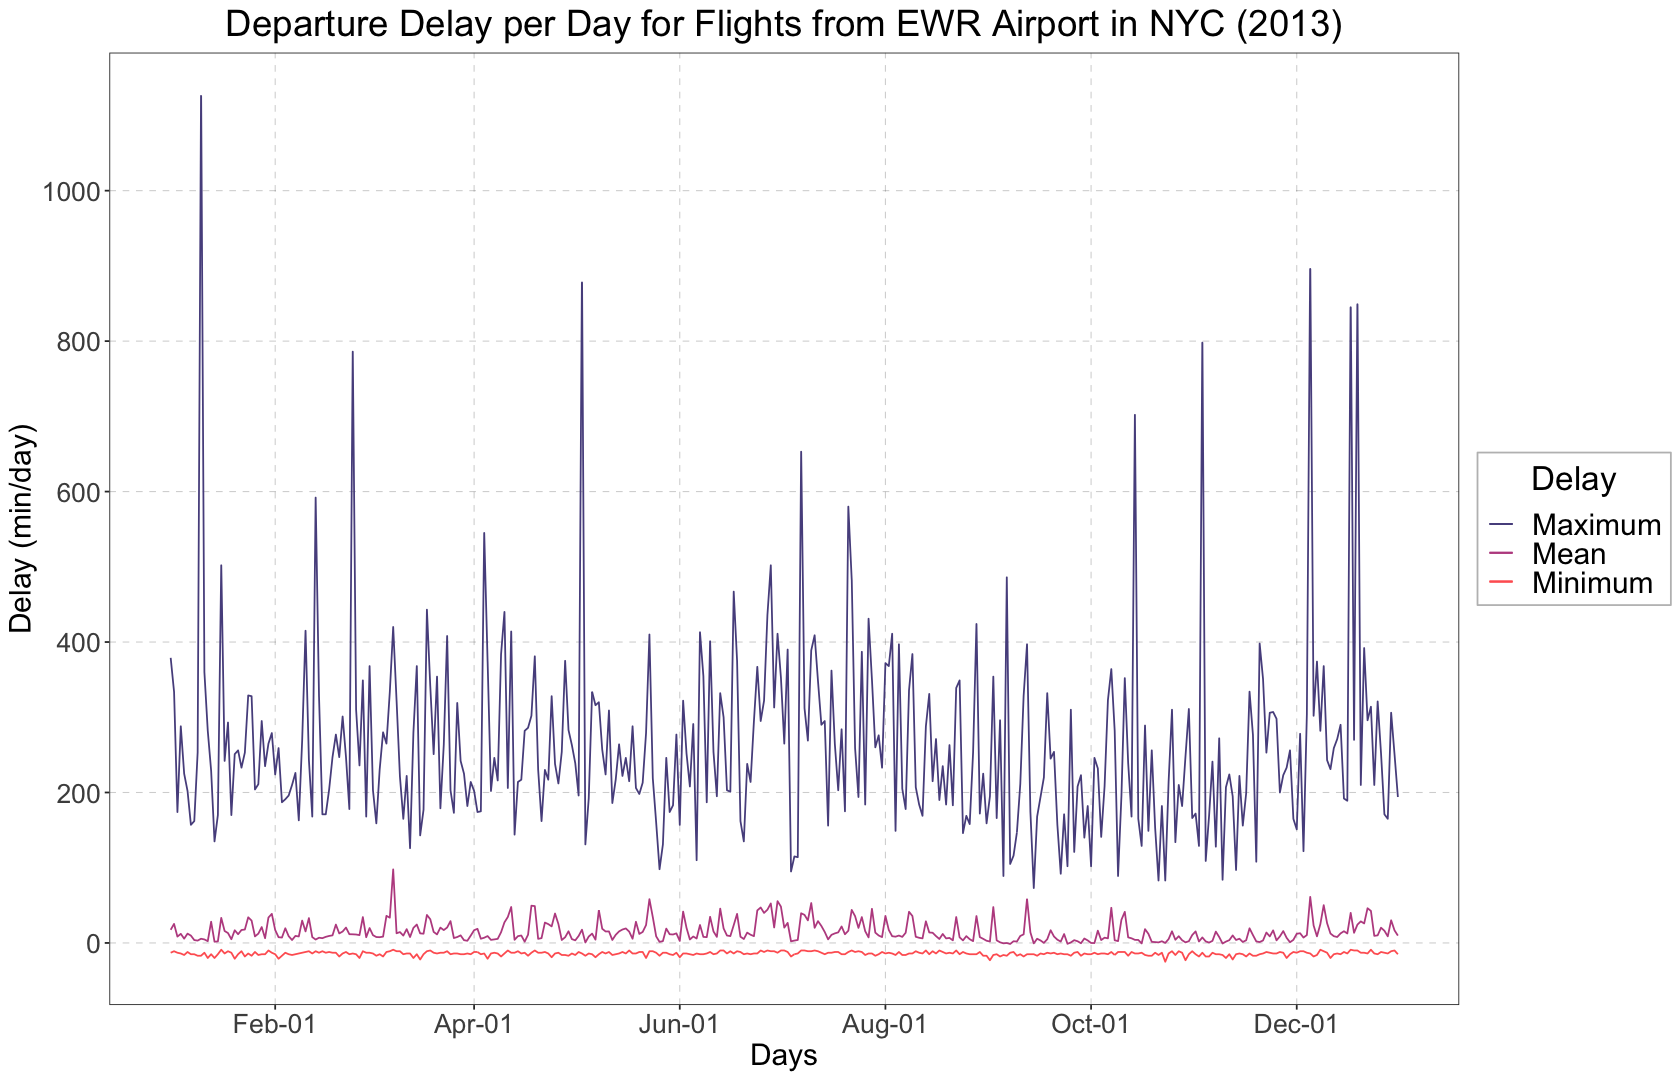

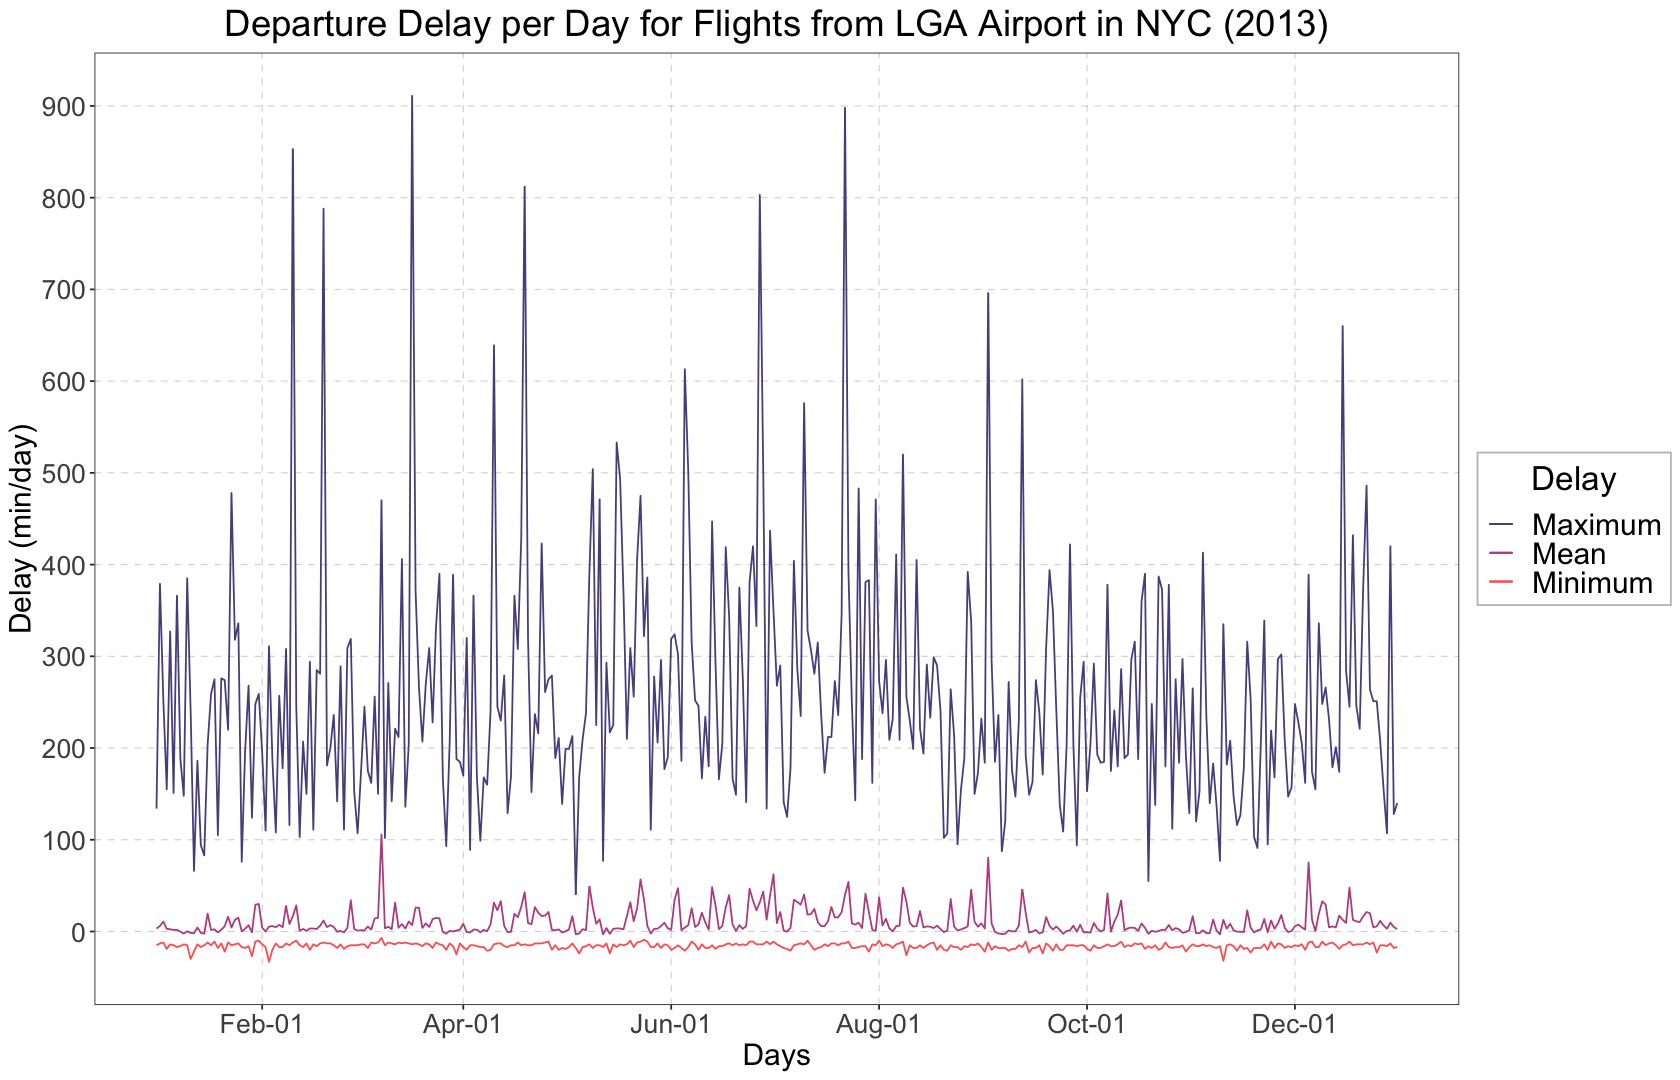

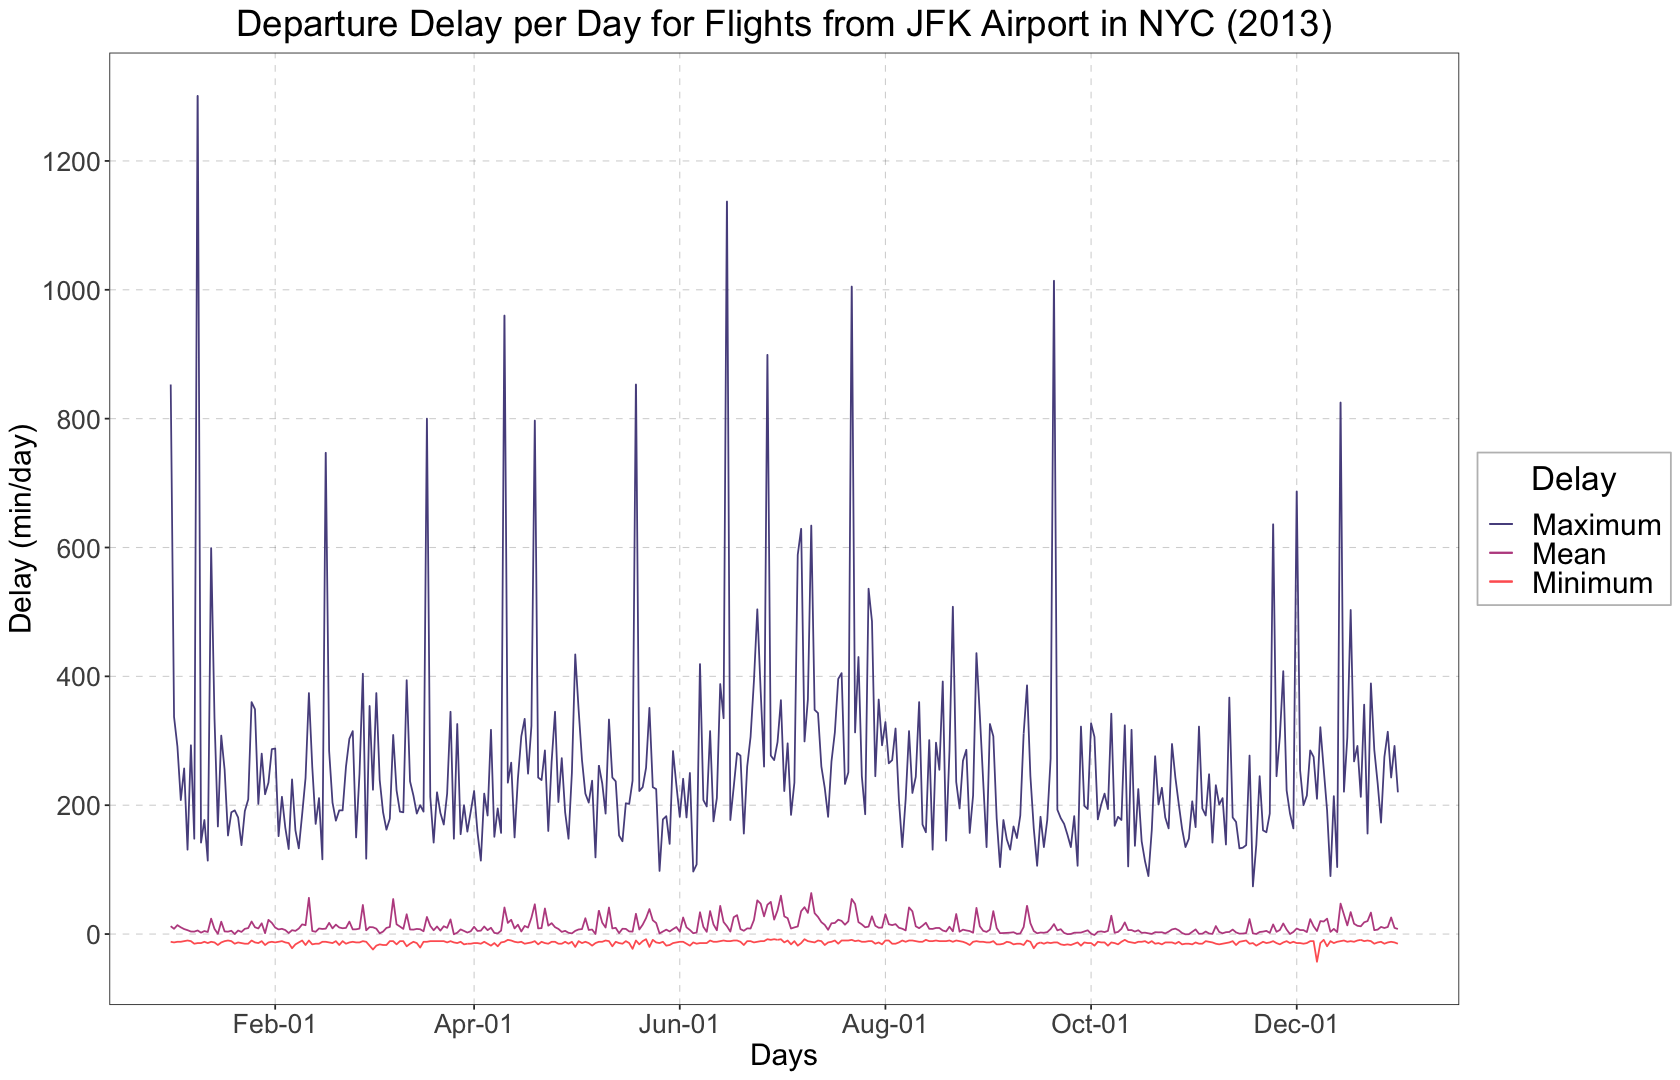

In [100]:
gEWR
gLGA
gJFK

### 3) Average speed of each plane

In [89]:
s <- flights %>% transmute( date = paste(year, month, day, sep = "-"),
                            duration = air_time / 60,       # hours
                            distance = distance * 1.609,    # km
                            plane = tailnum) 

s <- s %>% transmute( date = as.Date(date),
                      avSpeed = distance / duration,
                      plane = plane)
s <- s %>% filter(!is.na(avSpeed))

s <- s %>% group_by(date)
s <- s %>% summarise(mean = mean(avSpeed))
head(s)

date       mean    
1 2013-01-01 575.0771
2 2013-01-02 587.5402
3 2013-01-03 594.9819
4 2013-01-04 616.8570
5 2013-01-05 604.2606
6 2013-01-06 593.3873

In [90]:
# plot

ps <- ggplot(s, aes( x = date, y = mean) ) + 
      geom_line( linewidth = 0.8, color = "#58508d") 

ps <- ps +
        theme_bw() + 
        theme( plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        labs( x = "Days", 
              y = "Average Plane Speed (km/h)", 
              title = "Average Plane Speed per Day for Flights from NYC Airports in 2013" )

ps <- ps + 
      scale_x_date(date_breaks = "2 month", date_labels = "%b-%d") +
      scale_y_continuous( n.breaks = 8 )

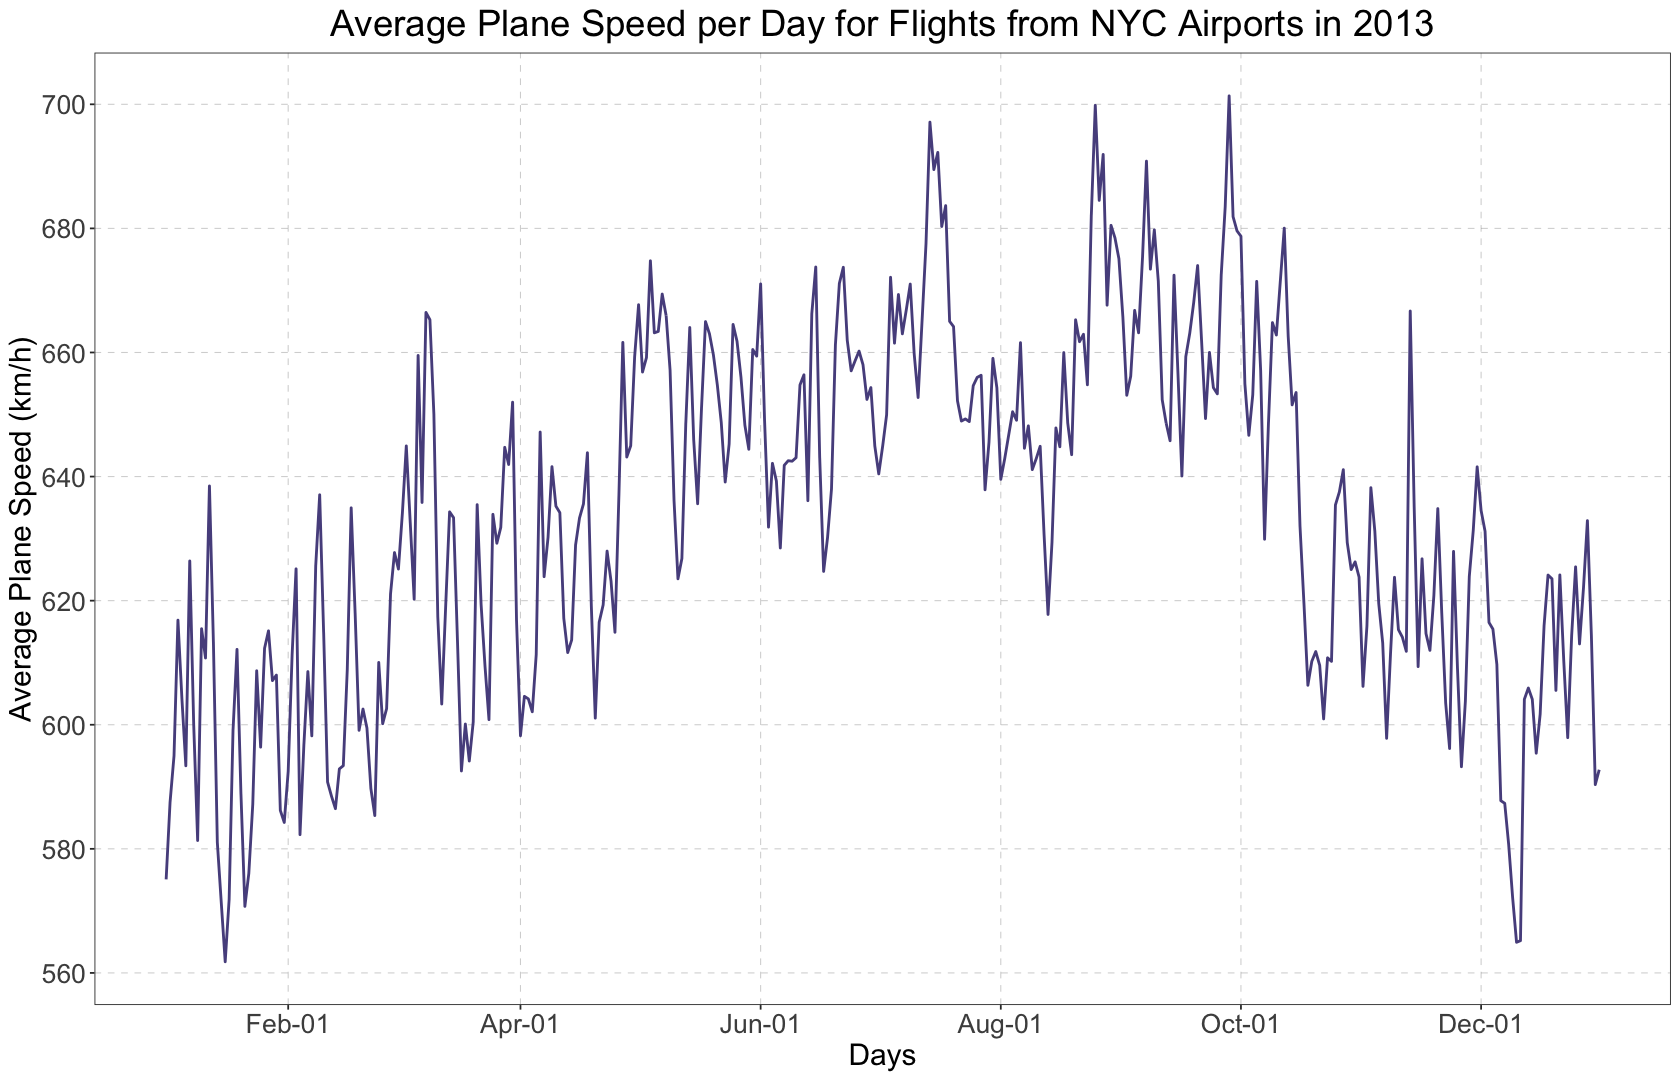

In [91]:
ps

### 4.1) Airline companies offering the largest two numbers of flights per day and per week

In [83]:
w <- flights %>% transmute( date = paste(year, month, day, sep = "-"),
                            flight = flight,
                            Airline = carrier)
w <- w %>% transmute( date = as.Date(date),
                      week = isoweek(ymd(date)),
                      flight = flight,
                      Airline = Airline)

# per day

wd <- w %>% group_by(date, Airline)
wd <- wd %>% transmute( date = date,
                        totDay = length(flight),
                        Airline = Airline)

# finding the largest two numbers

wd <- filter(wd, totDay >= max(totDay))
wd <- wd %>% slice(1:1)
wd <- wd %>% ungroup()
wd <- wd %>% arrange(desc(totDay)) %>% group_by(date) %>% slice(1:2)

head(wd)

date       totDay Airline
1 2013-01-01 165    UA     
2 2013-01-01 163    B6     
3 2013-01-02 170    UA     
4 2013-01-02 162    B6     
5 2013-01-03 162    B6     
6 2013-01-03 159    UA

In [84]:
# plot

m <- ggplot(wd, aes( x = date, y = totDay, color = Airline) ) + 
      geom_point( size = 2 ) 

m <- m +
        theme_bw() + 
        theme( plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Days", 
              y = "Number of Flights", 
              title = "Two Largest Numbers of Flights per Day - Flights From NYC Airports, 2013" )

m <- m + 
      scale_x_date(date_breaks = "1 month", date_labels = "%m/%d") +
      scale_y_continuous( n.breaks = 8 )

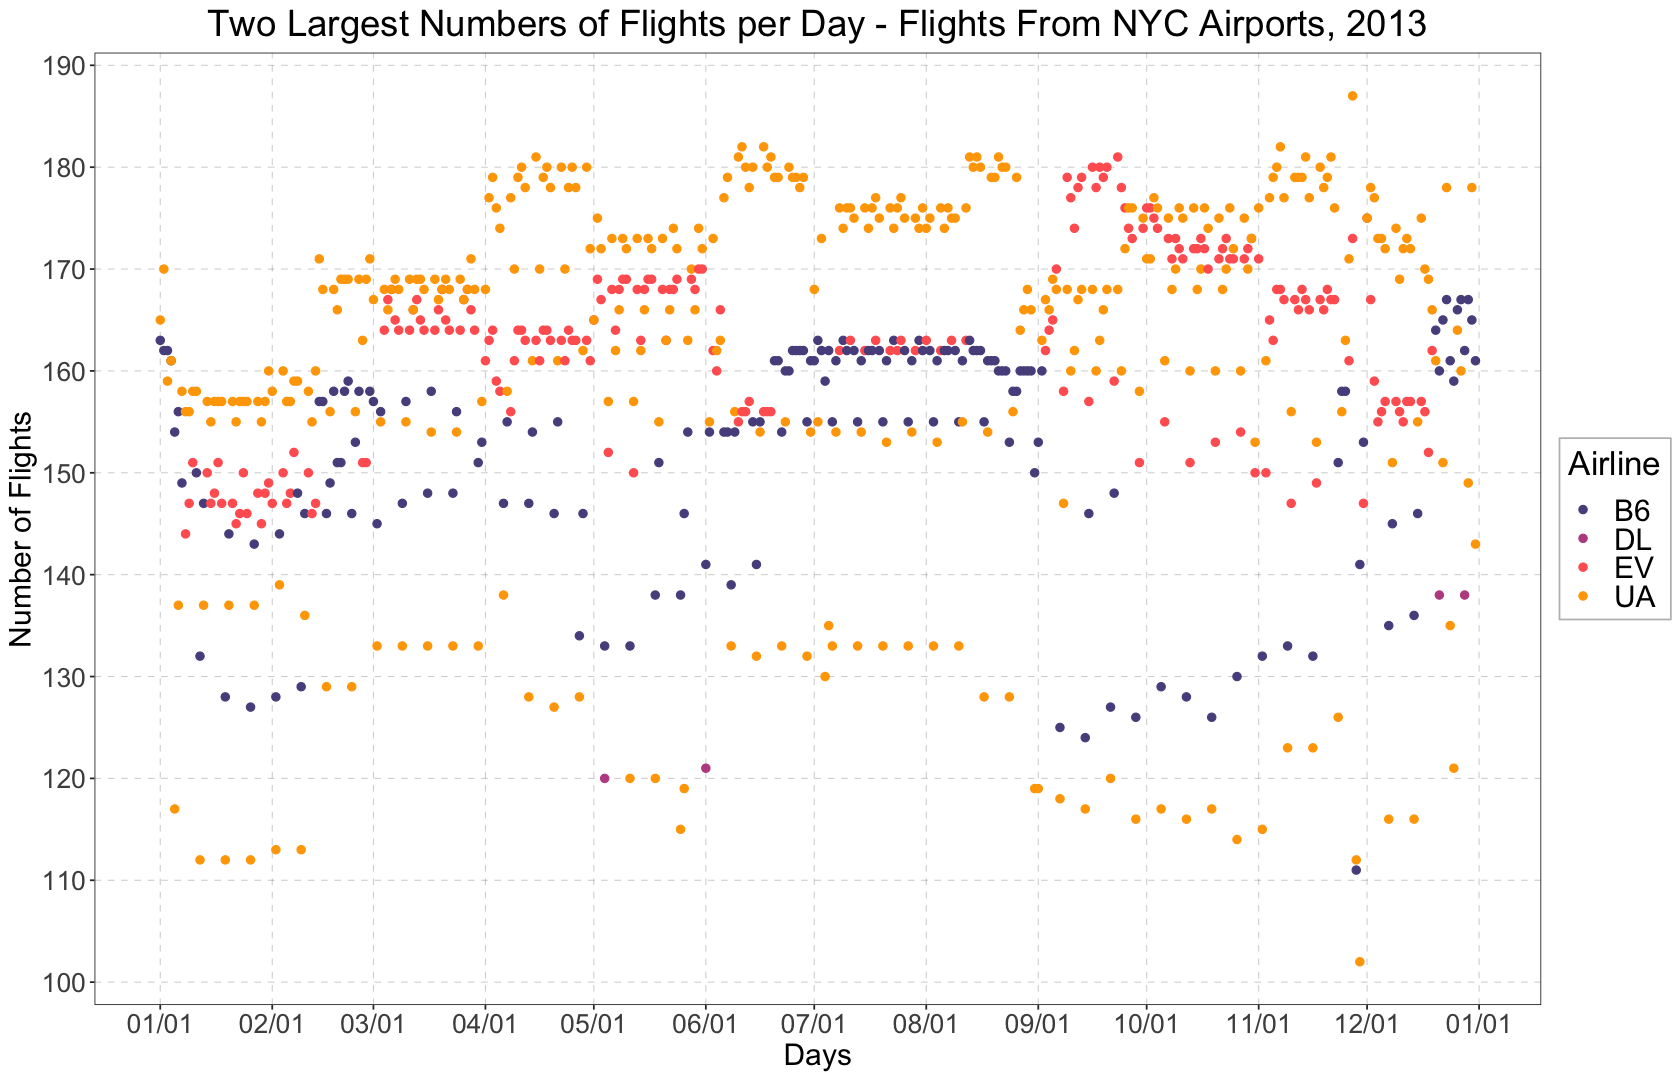

In [85]:
m

In [86]:
# week

ww <- w %>% group_by(week, Airline)
ww <- ww %>% transmute( week = week,
                        totWeek = length(flight),
                        Airline = Airline)

ww <- filter(ww, totWeek >= max(totWeek))
ww <- ww %>% slice(1:1)
ww <- ww %>% ungroup()
ww <- ww %>% arrange(desc(totWeek)) %>% group_by(week) %>% slice(1:2)

head(ww)

week totWeek Airline
1 1    1284    B6     
2 1    1230    UA     
3 2    1035    UA     
4 2     994    B6     
5 3    1032    UA     
6 3     970    B6

In [87]:
# plot

mm <- ggplot(ww, aes( x = week, y = totWeek, color = Airline) ) + 
      geom_point( size = 3)

mm <- mm +
        theme_bw() + 
        theme( plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Week Number", 
              y = "Number of Flights", 
              title = "Two Largest Numbers of Flights per Week - Flights From NYC Airports, 2013" )

mm <- mm + 
      scale_x_continuous( n.breaks = 10 ) +
      scale_y_continuous( n.breaks = 4 )

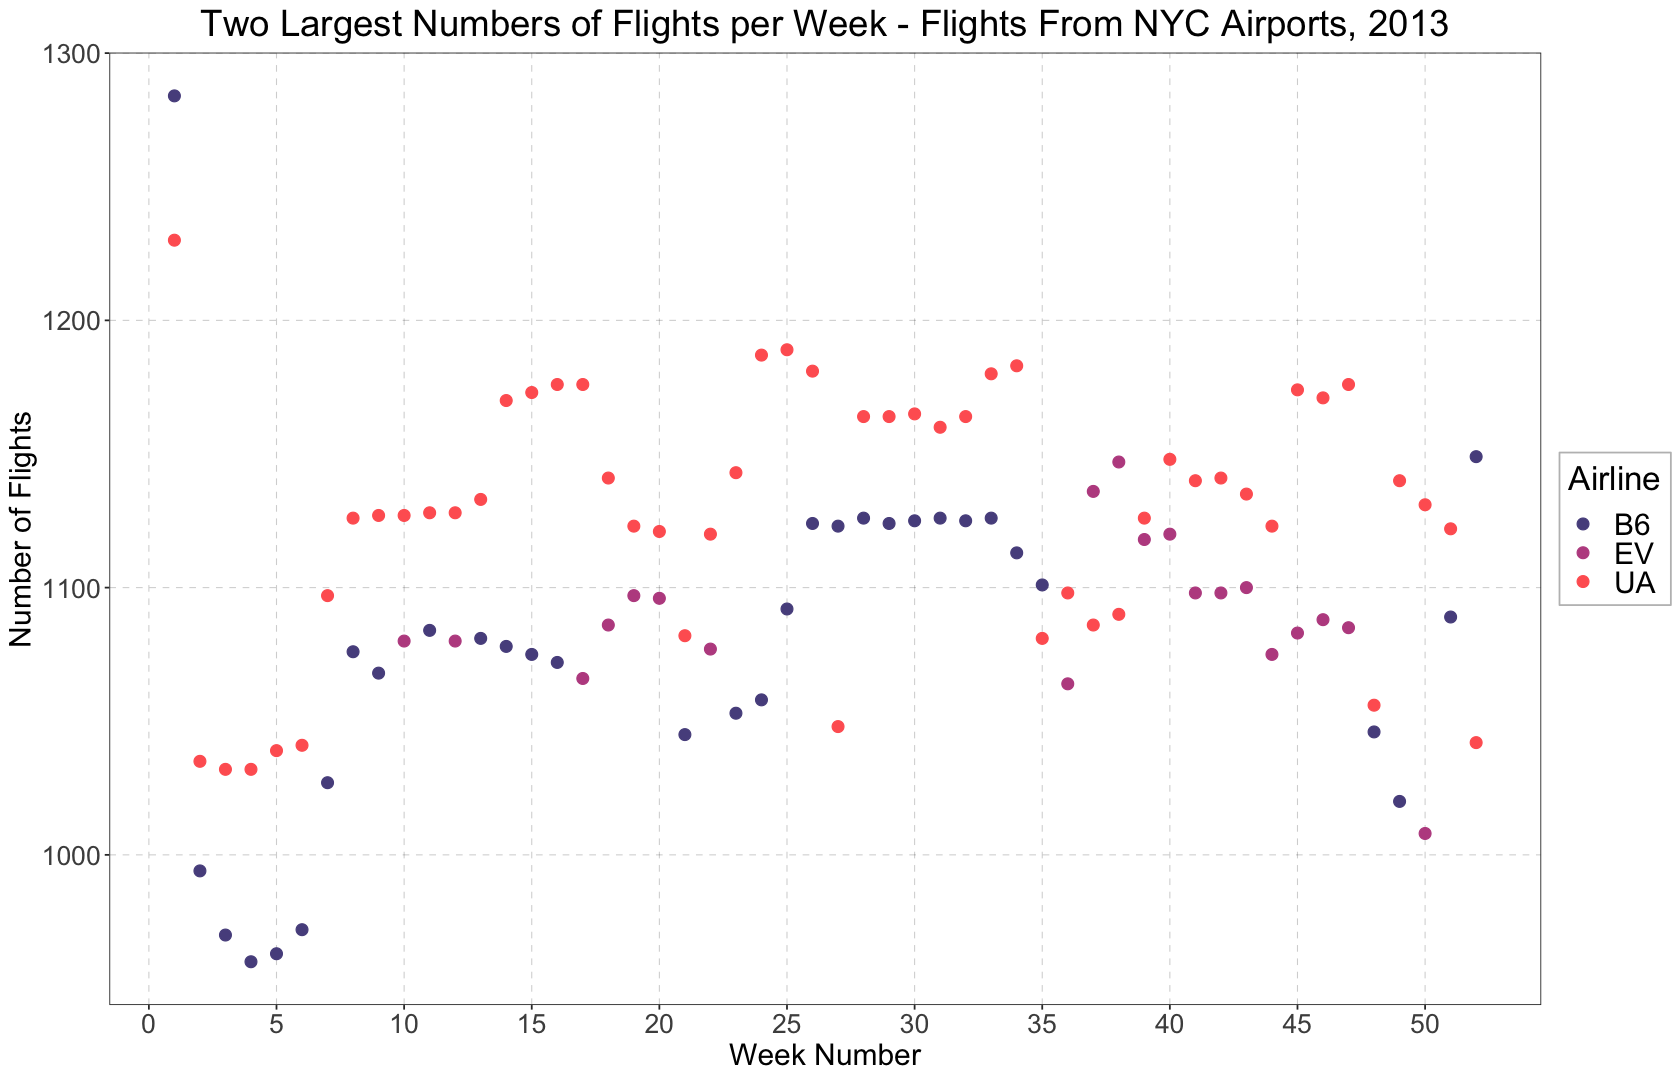

In [88]:
mm

### 4.2) Airline company offering the smallest number of flight per month

In [80]:
t <- flights %>% transmute( month = month.abb[month],
                            flight = flight,
                            Airline = carrier)
t <- t %>% group_by(month, Airline)
t <- t %>% transmute( month = month,
                      totMonth = length(flight),
                      Airline = Airline)
t <- filter(t, totMonth <= min(totMonth))
t <- t %>% slice(1:1)
t <- t %>% ungroup()
t <- t %>% arrange(desc(totMonth)) %>% group_by(month) %>% slice(1:1)
head(t)

month totMonth Airline
1 Apr   5047     UA     
2 Aug   5124     UA     
3 Dec   4931     UA     
4 Feb   4346     UA     
5 Jan   4637     UA     
6 Jul   5066     UA

In [81]:
# plot

z <- ggplot(t, aes( x = month, y = totMonth, color = Airline) ) + 
      geom_point( size = 4 ) 

z <- z +
        theme_bw() + 
        theme( plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text  = element_text(size = 16),
        legend.title = element_text(size = 20, hjust = 0.5),
        legend.text  = element_text(size = 18),
        panel.grid.major.y = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.major.x = element_line( color = alpha("black",0.2),
                                           linewidth = 0.3,
                                           linetype = 2 ),
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        legend.background = element_rect( fill = "white",
                                          linewidth = 0.5, 
                                          linetype = "solid", 
                                          colour = "grey" ) ) +
        scale_color_manual(values = color_palette) +
        labs( x = "Month", 
              y = "Number of Flights", 
              title = "Smallest Numbers of Flights per Month - Flights From NYC Airports, 2013" )

z <- z + 
      scale_y_continuous( n.breaks = 7 )

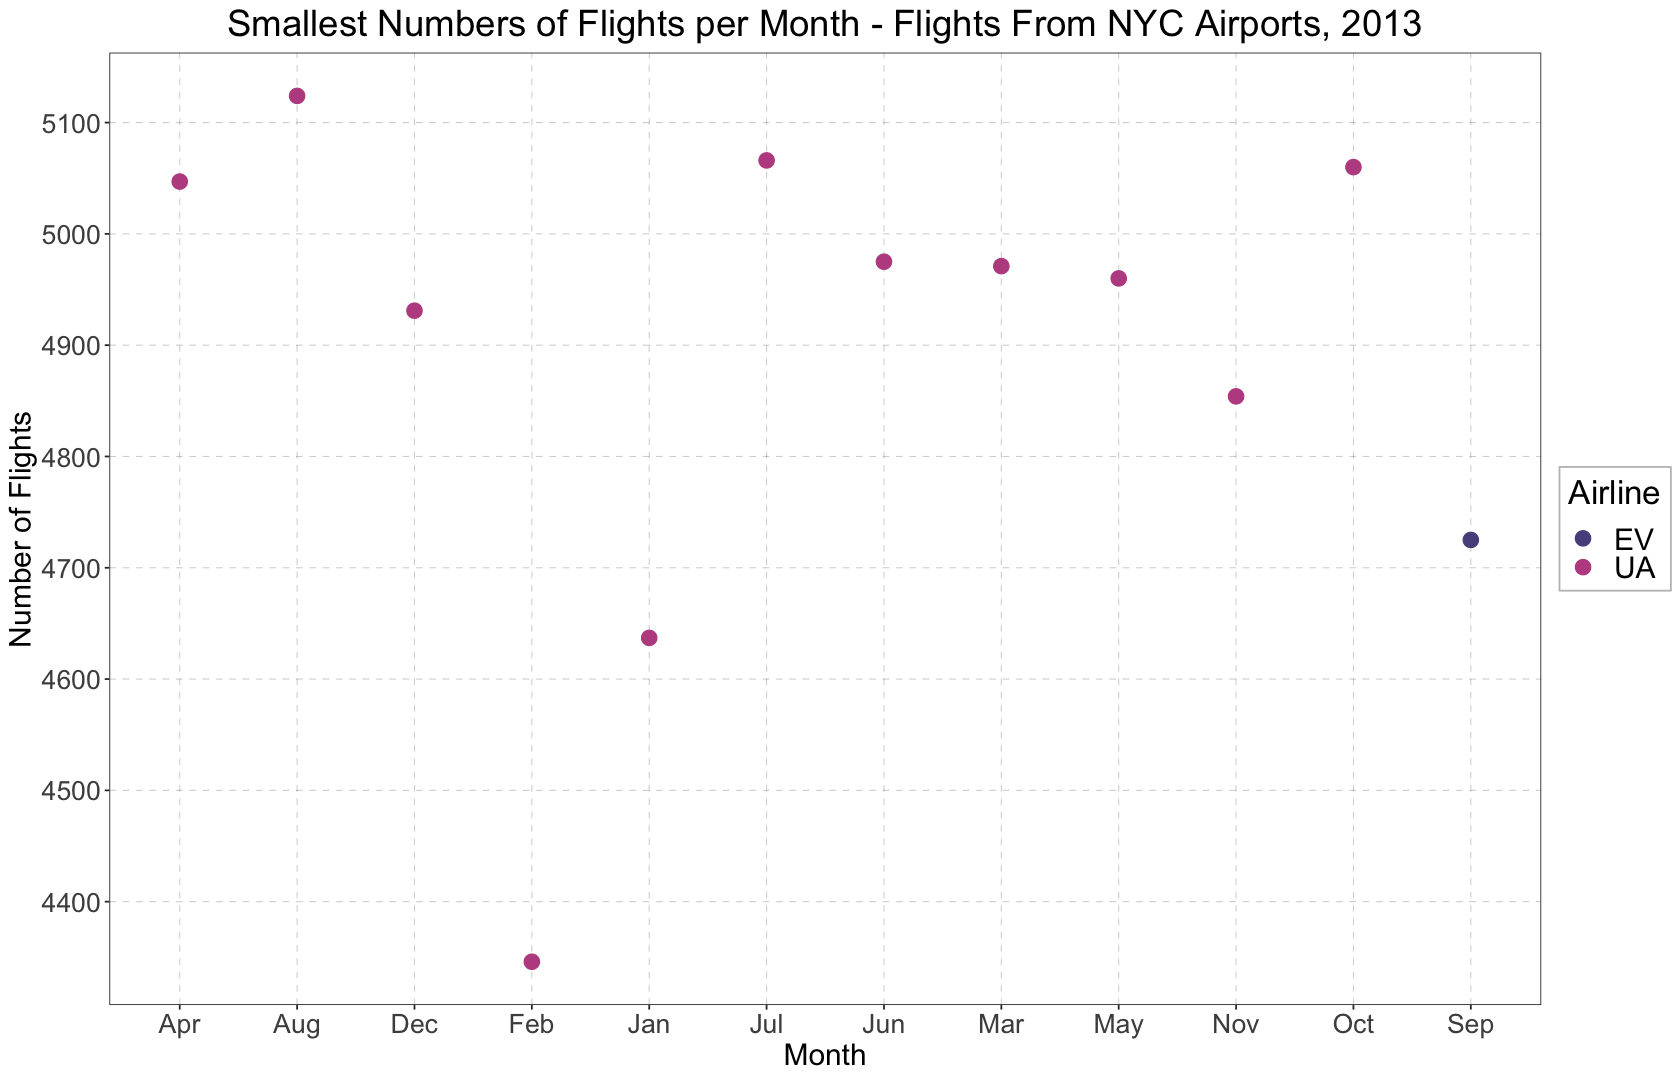

In [82]:
z

### 4.3) Airline company offering the longest distance flight per month

In [79]:
q <- flights %>% transmute( month = month.abb[month],
                            Airline = carrier,
                            distance = distance * 1.609) # km
q <- q %>% group_by(month)
q <- filter(q, distance >= max(distance))
q <- q %>% slice(1:1)
q

month Airline distance
1  Apr   HA      8017.647
2  Aug   HA      8017.647
3  Dec   HA      8017.647
4  Feb   HA      8017.647
5  Jan   HA      8017.647
6  Jul   HA      8017.647
7  Jun   HA      8017.647
8  Mar   HA      8017.647
9  May   HA      8017.647
10 Nov   HA      8017.647
11 Oct   HA      8017.647
12 Sep   HA      8017.647